## DATA GATHERING

### Gathering file 1: Import the files downloaded in local

In [7]:
import pandas as pd 
df_arc = pd.read_csv('twitter-archive-enhanced.csv')

### Gathering file 2: Download file from the internet using requests

In [8]:
import requests
import os

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [9]:
folder_name = 'Twitter_WeRateDogs_project'
file_name = 'image_predictions.tsv'

# because I am already at the directory where I want to save the file, the first parameter is simply the file name
with open('image_predictions.tsv', mode='wb') as file:
          file.write(response.content)

In [10]:
df_image = pd.read_csv('image_predictions.tsv', sep='\t')
df_image

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p1_conf  p1_dog                  p2  \
0           1  Welsh_springer_spaniel  0.465074    True              collie   
1           1                 redbone  0.506826    True  miniature_pinscher   
2           1         German_shepherd  0.596461    True            malinois   
3           1     Rhodesian_ridgeback  0.408143    True             redbone   
4           1      miniature_pinscher  0.560311    True          Rottweiler   
...       ...                     ...       ...     ...                 ...   
2070        2                  basset  0.555712    True    English_springer   
2071        1             paper_towel  0.170278   False  Labrador_retriever   
2072        1               Chihuahua  0.716012    True            malamute   
2073        1               Chihuahua  0.323581    True            Pekinese   
2074        1                  orange  0.097049   False               bagel   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0     0.156665    True            Shetland_sheepdog  0.061428    True  
1     0.074192    True          Rhodesian_ridgeback  0.072010    True  
2     0.138584    True                   bloodhound  0.116197    True  
3     0.360687    True           miniature_pinscher  0.222752    True  
4     0.243682    True                     Doberman  0.154629    True  
...        ...     ...                          ...       ...     ...  
2070  0.225770    True  German_short-haired_pointer  0.175219    True  
2071  0.168086    True                      spatula  0.040836   False  
2072  0.078253    True                       kelpie  0.031379    True  
2073  0.090647    True                     papillon  0.068957    True  
2074  0.085851   False                       banana  0.076110   False  

[2075 rows x 12 columns]

### Gathering file 3: Query Twitter API using Tweepy

In [11]:
import tweepy
import pandas as pd
import numpy as np
import json

In [12]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [13]:
tweet_test = api.get_status(892420643555336193, tweet_mode='extended')
tweet_test

Status(_api=<tweepy.api.API object at 0x113e2a910>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540, 'h

In [14]:
tt_j = tweet_test._json

type(json.dumps(tt_j))

str

In [16]:
#json.loads(tt_j)

In [17]:
# `with open` - to open our destination file
# `json.dump()` write the data object to the file (what we export)
with open ('tweet_test_json.txt', mode='w') as file:
    json.dump(tt_j, file) 
        # we have to change the datatype of the `status` object retrieved from tweep API first, otherwise the 
        # following error will occur: `TypeError: Object of type Status is not JSON serializable`

In [18]:
with open ('tweet_test_json.txt') as j_file:
    revived = json.load(j_file)

revived['id_str']

'892420643555336193'

In [19]:
with open ('tweet_test_json.txt', mode = 'a+') as file:
    file.write(json.dumps(tt_j)+'\n')
    file.close()

In [20]:
arc = pd.read_csv('twitter-archive-enhanced.csv')
arc.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [21]:
import sys
import time

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
error_list = []
for tweet_id in arc['tweet_id']:
    print (tweet_id)
    start = time.time()
    try: 
        tweet = api.get_status(tweet_id, mode='extended')
        with open('tweet_json.txt', mode='a+') as file:
            file.write(json.dumps(tweet._json)+'\n')
            file.close()
    except:
        print("Error: " + str(tweet_id))
        error_list.append(tweet_id)
    end = time.time()
    print (end - start)
    

892420643555336193
0.34602785110473633
892177421306343426
0.33450913429260254
891815181378084864
0.3431580066680908
891689557279858688
0.3460879325866699
891327558926688256
0.34293293952941895
891087950875897856
0.34574389457702637
890971913173991426
0.337446928024292
890729181411237888
0.34691667556762695
890609185150312448
0.34397387504577637
890240255349198849
0.33766603469848633
890006608113172480
0.3363938331604004
889880896479866881
0.3356342315673828
889665388333682689
0.34191107749938965
889638837579907072
0.3389127254486084
889531135344209921
0.34391093254089355
889278841981685760
0.34148359298706055
888917238123831296
0.3901989459991455
888804989199671297
0.3512279987335205
888554962724278272
0.3399770259857178
888202515573088257
Error: 888202515573088257
0.31868696212768555
888078434458587136
0.33927297592163086
887705289381826560
0.3443300724029541
887517139158093824
0.338547945022583
887473957103951883
0.3382911682128906
887343217045368832
0.35176515579223633
8871013928040

0.3478720188140869
852226086759018497
0.33022499084472656
852189679701164033
0.3397939205169678
851953902622658560
Error: 851953902622658560
0.3292050361633301
851861385021730816
0.3477048873901367
851591660324737024
0.3374950885772705
851464819735769094
0.36675310134887695
851224888060895234
0.33999085426330566
850753642995093505
0.3443031311035156
850380195714523136
0.3535187244415283
850333567704068097
0.3715677261352539
850145622816686080
0.3383021354675293
850019790995546112
0.33817195892333984
849776966551130114
0.3422050476074219
849668094696017920
0.3500030040740967
849412302885593088
0.3386869430541992
849336543269576704
0.3403329849243164
849051919805034497
0.34608030319213867
848690551926992896
0.34819889068603516
848324959059550208
0.3510611057281494
848213670039564288
0.3439791202545166
848212111729840128
0.334475040435791
847978865427394560
0.34972476959228516
847971574464610304
0.48319506645202637
847962785489326080
0.33465003967285156
847842811428974592
0.33547496795654

0.35103511810302734
822462944365645825
0.33815908432006836
822244816520155136
0.34064269065856934
822163064745328640
0.36220479011535645
821886076407029760
0.340378999710083
821813639212650496
0.3443419933319092
821765923262631936
0.3381619453430176
821522889702862852
0.337817907333374
821421320206483457
0.35474610328674316
821407182352777218
0.3397707939147949
821153421864615936
0.33387112617492676
821149554670182400
0.33447694778442383
821107785811234820
0.3408927917480469
821044531881721856
0.34209203720092773
820837357901512704
0.3436009883880615
820749716845686786
0.345242977142334
820690176645140481
0.3354532718658447
820494788566847489
0.3925466537475586
820446719150292993
0.3464930057525635
820314633777061888
0.334259033203125
820078625395449857
0.3358950614929199
820013781606658049
0.343674898147583
819952236453363712
0.3366427421569824
819924195358416896
0.3334028720855713
819711362133872643
0.337465763092041
819588359383371776
0.3389589786529541
819347104292290561
0.33543181

0.33640384674072266
794205286408003585
0.3602900505065918
793962221541933056
0.3411598205566406
793845145112371200
0.33995795249938965
793614319594401792
0.3434321880340576
793601777308463104
0.3390491008758545
793500921481273345
0.34264707565307617
793286476301799424
0.3344697952270508
793271401113350145
0.3378720283508301
793256262322548741
0.35220980644226074
793241302385262592
0.3589789867401123
793226087023144960
0.34236621856689453
793210959003287553
0.3647880554199219
793195938047070209
0.3478889465332031
793180763617361921
0.3376162052154541
793165685325201412
0.3448331356048584
793150605191548928
0.3352839946746826
793135492858580992
0.34651708602905273
793120401413079041
0.33513903617858887
792913359805018113
0.33730220794677734
792883833364439040
0.339993953704834
792773781206999040
0.3371551036834717
792394556390137856
0.34792613983154297
792050063153438720
0.3396589756011963
791821351946420224
0.3486018180847168
791784077045166082
0.3910031318664551
791780927877898241
0.34

0.3388800621032715
766714921925144576
0.347012996673584
766693177336135680
0.3337719440460205
766423258543644672
0.33367204666137695
766313316352462849
0.33463597297668457
766078092750233600
0.3427760601043701
766069199026450432
0.3321061134338379
766008592277377025
0.33968114852905273
765719909049503744
0.3395848274230957
765669560888528897
0.33664822578430176
765395769549590528
0.3932318687438965
765371061932261376
0.33467793464660645
765222098633691136
0.3346121311187744
764857477905154048
0.351668119430542
764259802650378240
0.34078526496887207
763956972077010945
0.337050199508667
763837565564780549
0.33296680450439453
763183847194451968
0.3372640609741211
763167063695355904
0.3444221019744873
763103485927849985
0.34744882583618164
762699858130116608
0.3336348533630371
762471784394268675
0.3450188636779785
762464539388485633
0.34191107749938965
762316489655476224
0.34035515785217285
762035686371364864
0.3552558422088623
761976711479193600
0.3434722423553467
761750502866649088
0.373

Rate limit reached. Sleeping for: 552


557.5484652519226
758740312047005698
0.36026906967163086
758474966123810816
0.3360300064086914
758467244762497024
0.3426477909088135
758405701903519748
0.3452908992767334
758355060040593408
0.3522937297821045
758099635764359168
0.3378298282623291
758041019896193024
0.3341050148010254
757741869644341248
0.33379197120666504
757729163776290825
0.3388528823852539
757725642876129280
0.3961501121520996
757611664640446465
0.35062575340270996
757597904299253760
0.3476548194885254
757596066325864448
0.3394951820373535
757400162377592832
0.3454458713531494
757393109802180609
0.3490419387817383
757354760399941633
0.3420240879058838
756998049151549440
0.3828597068786621
756939218950160384
0.3391740322113037
756651752796094464
0.3383491039276123
756526248105566208
0.3399829864501953
756303284449767430
0.3411099910736084
756288534030475264
0.3370487689971924
756275833623502848
0.3371908664703369
755955933503782912
0.33815598487854004
755206590534418437
0.3347010612487793
755110668769038337
0.4674050

0.3372199535369873
733109485275860992
0.3416280746459961
732732193018155009
0.33830714225769043
732726085725589504
0.340303897857666
732585889486888962
0.33571720123291016
732375214819057664
0.33658766746520996
732005617171337216
0.33658504486083984
731285275100512256
0.3662288188934326
731156023742988288
0.3336141109466553
730924654643314689
0.3377349376678467
730573383004487680
0.33181095123291016
730427201120833536
0.3464839458465576
730211855403241472
0.3530092239379883
730196704625098752
0.34369897842407227
729854734790754305
0.34392499923706055
729838605770891264
0.3395521640777588
729823566028484608
0.3341958522796631
729463711119904772
0.33766913414001465
729113531270991872
0.34203600883483887
728986383096946689
0.33290815353393555
728760639972315136
0.33754587173461914
728751179681943552
0.3424348831176758
728653952833728512
0.3353841304779053
728409960103686147
0.3358609676361084
728387165835677696
0.33846211433410645
728046963732717569
0.3358628749847412
728035342121635841
0

0.35637402534484863
705975130514706432
0.3441162109375
705970349788291072
0.3441619873046875
705898680587526145
0.33611011505126953
705786532653883392
0.335040807723999
705591895322394625
0.34409117698669434
705475953783398401
0.3365941047668457
705442520700944385
0.34273362159729004
705428427625635840
0.3464639186859131
705239209544720384
0.3394172191619873
705223444686888960
0.3342289924621582
705102439679201280
0.34716129302978516
705066031337840642
0.3477439880371094
704871453724954624
0.37470102310180664
704859558691414016
0.34588027000427246
704847917308362754
0.3412938117980957
704819833553219584
0.4425089359283447
704761120771465216
0.36011695861816406
704499785726889984
0.3361492156982422
704491224099647488
0.3426632881164551
704480331685040129
0.3415062427520752
704364645503647744
0.3344550132751465
704347321748819968
0.3643367290496826
704134088924532736
0.34585022926330566
704113298707505153
0.44034504890441895
704054845121142784
0.3359811305999756
703774238772166656
0.3429

0.3360481262207031
689623661272240129
0.33330726623535156
689599056876867584
0.3351421356201172
689557536375177216
0.3352320194244385
689517482558820352
0.3398139476776123
689289219123089408
0.35308408737182617
689283819090870273
0.3347907066345215
689280876073582592
0.3398411273956299
689275259254616065
0.3387031555175781
689255633275777024
0.6539499759674072
689154315265683456
0.8193221092224121
689143371370250240
0.8005797863006592
688916208532455424
0.6859650611877441
688908934925697024
0.6785967350006104
688898160958271489
0.34026288986206055
688894073864884227
0.3346860408782959
688828561667567616
0.35022902488708496
688804835492233216
0.33725595474243164
688789766343622656
0.3392219543457031
688547210804498433
0.3586239814758301
688519176466644993
0.3357698917388916
688385280030670848
0.33871006965637207
688211956440801280
0.3422880172729492
688179443353796608
0.33336305618286133
688116655151435777
0.3348112106323242
688064179421470721
0.33526182174682617
687841446767013888
0.34

0.33658504486083984
678798276842360832
0.3513331413269043
678774928607469569
0.33220505714416504
678767140346941444
0.3477160930633545
678764513869611008
0.33977293968200684
678755239630127104
0.3351099491119385
678740035362037760
0.33382201194763184
678708137298427904
0.3487999439239502
678675843183484930
0.34702110290527344
678643457146150913
0.33576011657714844
678446151570427904
0.33574604988098145
678424312106393600
0.3324260711669922
678410210315247616
0.33621931076049805
678399652199309312
0.33538293838500977
678396796259975168
0.3442049026489258
678389028614488064
0.34572887420654297
678380236862578688
0.332334041595459
678341075375947776
0.3724842071533203
678334497360859136
0.3354010581970215
678278586130948096
0.34619975090026855
678255464182861824
0.33782386779785156
678023323247357953
0.3433411121368408
678021115718029313
0.3507349491119385
677961670166224897
0.3333752155303955
677918531514703872
0.3372499942779541
677895101218201600
0.34203600883483887
677716515794329600


Rate limit reached. Sleeping for: 586


591.5719001293182
676975532580409345
0.3690609931945801
676957860086095872
0.3659820556640625
676949632774234114
0.35985517501831055
676948236477857792
0.3613560199737549
676946864479084545
0.37399721145629883
676942428000112642
0.36467409133911133
676936541936185344
0.3625831604003906
676916996760600576
0.3595008850097656
676897532954456065
0.36631178855895996
676864501615042560
0.36475706100463867
676821958043033607
0.36138010025024414
676819651066732545
0.3683900833129883
676811746707918848
0.35999202728271484
676776431406465024
0.36661696434020996
676617503762681856
0.3681321144104004
676613908052996102
0.36275506019592285
676606785097199616
0.36195874214172363
676603393314578432
0.37871408462524414
676593408224403456
0.36054301261901855
676590572941893632
0.3626129627227783
676588346097852417
0.3833451271057129
676582956622721024
0.37285399436950684
676575501977128964
0.3642551898956299
676533798876651520
0.3606400489807129
676496375194980353
0.37061500549316406
676470639084101634

0.36091184616088867
672222792075620352
0.35994410514831543
672205392827572224
0.36938905715942383
672169685991993344
0.3563377857208252
672160042234327040
0.37910914421081543
672139350159835138
0.3660140037536621
672125275208069120
0.36202311515808105
672095186491711488
0.3596951961517334
672082170312290304
0.36582136154174805
672068090318987265
0.36710309982299805
671896809300709376
0.3641219139099121
671891728106971137
0.3604590892791748
671882082306625538
0.3570570945739746
671879137494245376
0.35919904708862305
671874878652489728
0.3591880798339844
671866342182637568
0.36347198486328125
671855973984772097
0.36221814155578613
671789708968640512
0.3631019592285156
671768281401958400
0.3597080707550049
671763349865160704
0.3570852279663086
671744970634719232
0.3585021495819092
671743150407421952
0.37583208084106445
671735591348891648
0.3771216869354248
671729906628341761
0.37648725509643555
671561002136281088
0.359724760055542
671550332464455680
0.37227392196655273
671547767500775424


0.3735530376434326
668256321989451776
0.36142492294311523
668248472370458624
0.3634340763092041
668237644992782336
0.36420679092407227
668226093875376128
0.36194586753845215
668221241640230912
0.35941410064697266
668204964695683073
0.36505699157714844
668190681446379520
0.37335896492004395
668171859951755264
0.37192487716674805
668154635664932864
0.36740922927856445
668142349051129856
0.3629477024078369
668113020489474048
0.35907673835754395
667937095915278337
0.35930490493774414
667924896115245057
0.3597581386566162
667915453470232577
0.363847017288208
667911425562669056
0.36534905433654785
667902449697558528
0.3640449047088623
667886921285246976
0.3758997917175293
667885044254572545
0.3624410629272461
667878741721415682
0.3631551265716553
667873844930215936
0.3637371063232422
667866724293877760
0.3739809989929199
667861340749471744
0.36649012565612793
667832474953625600
0.3806147575378418
667806454573760512
0.3570539951324463
667801013445750784
0.36782002449035645
667793409583771648


In [22]:
#with open ('tweet_json.txt') as json_f:
#    data = json.load(json_f) # this can only load one single json but since my file has many json (one json as 
                                # a line, `json.load()` cannot read the file)

In [23]:
tweets = []
for line in open('tweet_json.txt', 'r'):
    tweets.append(json.loads(line))

In [24]:
tweets

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},
      'large': {'w': 540, 'h': 528, 

In [25]:
tweet_id = []
retweet_count = []
favorite_count = []

for json in tweets:
    tweet_id.append(json['id_str'])
    retweet_count.append(json['retweet_count'])
    favorite_count.append(json['favorite_count'])
    
data = {'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count}
df_tweet = pd.DataFrame(data)

df_tweet

tweet_id  retweet_count  favorite_count
0     892420643555336193           7743           36402
1     892177421306343426           5734           31341
2     891815181378084864           3796           23621
3     891689557279858688           7898           39678
4     891327558926688256           8533           37882
...                  ...            ...             ...
4657  666049248165822465             41              96
4658  666044226329800704            132             273
4659  666033412701032449             41             112
4660  666029285002620928             42             121
4661  666020888022790149            465            2424

[4662 rows x 3 columns]

## ASSESSING DATA

In [26]:
df_arc.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [27]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
df_arc.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7   
2355  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator  name doggo floofer pupper puppo  
2351                  10  None  None    None   None  None  
2352                  10     a  None    None   None  None  
2353                  10     a  None    None   None  None  
2354                  10     a  None    None   None  None  
2355                  10  None  None    None   None  None

In [29]:
df_arc.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [30]:
df_arc[df_arc.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [31]:
df_arc.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
198   854365224396361728                    NaN                  NaN   
1346  704480331685040129                    NaN                  NaN   
1944  673708611235921920                    NaN                  NaN   
1646  683834909291606017                    NaN                  NaN   
2234  668190681446379520                    NaN                  NaN   
1753  678800283649069056                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2211  668614819948453888                    NaN                  NaN   
1907  674447403907457024                    NaN                  NaN   
1811  676819651066732545                    NaN                  NaN   

                      timestamp  \
198   2017-04-18 16:05:17 +0000   
1346  2016-03-01 01:36:14 +0000   
1944  2015-12-07 03:40:24 +0000   
1646  2016-01-04 02:18:42 +0000   
2234  2015-11-21 22:14:07 +0000   
1753  2015-12-21 04:52:53 +0000   
2340  2015-11-16 03:44:34 +0000   
2211  2015-11-23 02:19:29 +0000   
1907  2015-12-09 04:36:06 +0000   
1811  2015-12-15 17:42:34 +0000   

                                                 source  \
198   <a href="http://twitter.com/download/iphone" r...   
1346  <a href="http://twitter.com/download/iphone" r...   
1944  <a href="http://twitter.com/download/iphone" r...   
1646  <a href="http://twitter.com/download/iphone" r...   
2234  <a href="http://twitter.com/download/iphone" r...   
1753  <a href="http://twitter.com/download/iphone" r...   
2340  <a href="http://twitter.com/download/iphone" r...   
2211  <a href="http://twitter.com/download/iphone" r...   
1907  <a href="http://twitter.com/download/iphone" r...   
1811  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
198   This is Einstein. He's having a really good da...                  NaN   
1346  Meet Lucia. She's a Cumulonimbus Floofmallow. ...                  NaN   
1944  This is Riley. She's just an adorable football...                  NaN   
1646  Here we see a faulty pupper. Might need to rep...                  NaN   
2234  This is Skittles. I would kidnap Skittles. Pin...                  NaN   
1753  Here's a pupper with some mean tan lines. Snaz...                  NaN   
2340  Can stand on stump for what seems like a while...                  NaN   
2211  Here is a horned dog. Much grace. Can jump ove...                  NaN   
1907  This pupper just wants a belly rub. This puppe...                  NaN   
1811  Watch out Airbud. This pupper is also good at ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
198                        NaN                        NaN   
1346                       NaN                        NaN   
1944                       NaN                        NaN   
1646                       NaN                        NaN   
2234                       NaN                        NaN   
1753                       NaN                        NaN   
2340                       NaN                        NaN   
2211                       NaN                        NaN   
1907                       NaN                        NaN   
1811                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
198   https://twitter.com/dog_rates/status/854365224...                13   
1346  https://twitter.com/dog_rates/status/704480331...                11   
1944  https://twitter.com/dog_rates/status/673708611...                12   
1646  https://twitter.com/dog_rates/status/683834909...                 9   
2234  https://twitter.com/dog_rates/status/668190681...                12   
1753  https://twitter.com/dog_rates/status/678800283...                12   
2340  https://twitter.com/dog_rates/status/666099513...                 8   
2211  https://twit

In [32]:
df_arc[df_arc.tweet_id.duplicated()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [33]:
df_arc.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Lulu          1
Nimbus        1
Cilantro      1
Clyde         1
Bowie         1
Name: name, Length: 957, dtype: int64

In [34]:
df_arc[df_arc.name == 'None']['text']

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
24      You may not have known you needed to see this ...
25      This... is a Jubilant Antarctic House Bear. We...
                              ...                        
2342    Here we have a well-established sunblockerspan...
2343    Let's hope this flight isn't Malaysian (lol). ...
2344    Here we have a northern speckled Rhododendron....
2351    Here we have a 1949 1st generation vulpix. Enj...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 745, dtype: object

In [35]:
df_arc[df_arc.rating_denominator!= 10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [36]:
df_arc.query('rating_numerator < 10')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
45    883482846933004288                    NaN                  NaN   
229   848212111729840128                    NaN                  NaN   
315   835152434251116546                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
462   817502432452313088                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
45    2017-07-08 00:28:19 +0000   
229   2017-04-01 16:35:01 +0000   
315   2017-02-24 15:40:31 +0000   
387   2017-02-01 01:11:25 +0000   
462   2017-01-06 22:45:43 +0000   
...                         ...   
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
45    <a href="http://twitter.com/download/iphone" r...   
229   <a href="http://twitter.com/download/iphone" r...   
315   <a href="http://twitter.com/download/iphone" r...   
387   <a href="http://twitter.com/download/iphone" r...   
462   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
45    This is Bella. She hopes her smile made you sm...                  NaN   
229   This is Jerry. He's doing a distinguished tong...                  NaN   
315   When you're so blinded by your systematic plag...                  NaN   
387   I was going to do 007/10, but the joke wasn't ...                  NaN   
462   RT @dog_rates: Meet Herschel. He's slightly bi...         6.924173e+17   
...                                                 ...                  ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
45                         NaN                        NaN   
229                        NaN                        NaN   
315                        NaN                        NaN   
387                        NaN                        NaN   
462               4.196984e+09  2016-01-27 18:42:06 +0000   
...                        ...                        ...   
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
45    https://twitter.com/dog_rates/status/883482846...                 5   
229   https://twitter.com/dog_rates/status/848212111...                 6   
315   https://twitter.com/dog_rates/status/835152434...                 0   
387                

In [37]:
df_arc[df_arc['in_reply_to_status_id'].notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
...                  ...                    ...                  ...   
2038  671550332464455680           6.715449e+17         4.196984e+09   
2149  669684865554620416           6.693544e+17         4.196984e+09   
2169  669353438988365824           6.678065e+17         4.196984e+09   
2189  668967877119254528           6.689207e+17         2.143566e+07   
2298  667070482143944705           6.670655e+17         4.196984e+09   

                      timestamp  \
30    2017-07-15 16:51:35 +0000   
55    2017-07-02 21:58:53 +0000   
64    2017-06-27 12:14:36 +0000   
113   2017-06-02 19:38:25 +0000   
148   2017-05-13 16:15:35 +0000   
...                         ...   
2038  2015-12-01 04:44:10 +0000   
2149  2015-11-26 01:11:28 +0000   
2169  2015-11-25 03:14:30 +0000   
2189  2015-11-24 01:42:25 +0000   
2298  2015-11-18 20:02:51 +0000   

                                                 source  \
30    <a href="http://twitter.com/download/iphone" r...   
55    <a href="http://twitter.com/download/iphone" r...   
64    <a href="http://twitter.com/download/iphone" r...   
113   <a href="http://twitter.com/download/iphone" r...   
148   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2038  <a href="http://twitter.com/download/iphone" r...   
2149  <a href="http://twitter.com/download/iphone" r...   
2169  <a href="http://twitter.com/download/iphone" r...   
2189  <a href="http://twitter.com/download/iphone" r...   
2298  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
30    @NonWhiteHat @MayhewMayhem omg hello tanner yo...                  NaN   
55    @roushfenway These are good dogs but 17/10 is ...                  NaN   
64                      @RealKentMurphy 14/10 confirmed                  NaN   
113   @ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...                  NaN   
148   @Jack_Septic_Eye I'd need a few more pics to p...                  NaN   
...                                                 ...                  ...   
2038  After 22 minutes of careful deliberation this ...                  NaN   
2149  After countless hours of research and hundreds...                  NaN   
2169  This is Tessa. She is also very pleased after ...                  NaN   
2189                     12/10 good shit Bubka\n@wane15                  NaN   
2298  After much debate this dog is being upgraded t...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
30                         NaN                        NaN   
55                         NaN                        NaN   
64                         NaN                        NaN   
113                        NaN                        NaN   
148                        NaN                        NaN   
...                        ...                        ...   
2038                       NaN                        NaN   
2149                       NaN                        NaN   
2169                       NaN                        NaN   
2189                       NaN                        NaN   
2298                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
30                                                  NaN                12   
55                                                  NaN                17   
64                                                  NaN                14   
113                

In [38]:
df_arc['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

## DATA CLEANING  
*Don't forget to create a copy before cleaning..*

### Problems with `df_arc`
#### Quality issue (8)
1. Missing values in columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`
2. 14 rows have more than one 'dog stage'
3. `timestamp ` and `retweeted_status_timestamp` should be datetime data type but not object
3. `tweet_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` should be strings but they are numbers here
4. Accuracy of `name`
5. `in_reply_to_status_id`, `in_reply_to_user_id` have scientific numbers (in string format)
6. The minimum and maximum of `rating_denominator` is problematic -- it should be 10 anyways. 
7. Minimum `rating_numerator` is zero? better check
8. `None` should be `Nan` (`np.nan`) if the value is not available in `rating_numerator`and `rating_denominator`.
9. Remove retweets


#### Tidiness issue (2)
1. The four columns `doggo`, `floofer`, `pupper` and `puppo` should be one column `dog_stage`
2. `df_arc` should be split into two tables, one about the tweet itself while the other about dog featured in the tweet where `tweet_id` is the unique identifier

### Quality issue (1) - missing values
Missing values in columns: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `expanded_urls`

**Define:**   
There is no data of `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` in the original json data. Hence we cannot fill them up. 

**Define:**   
Find the `in_reply_to_status_id`, `in_reply_to_user_id` and `expanded_urls` from the tweet_json.txt and create new columns in the `df_tweet`  dataframe for join later. Remove the original columns.

**Code:**

In [39]:
df_arc.iloc[0]['expanded_urls']

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [40]:
tweet_id = []
retweet_count = []
favorite_count = []
in_reply_to_status_id_rev = []
in_reply_to_user_id_rev = []

for json in tweets:
    tweet_id.append(json['id_str'])
    retweet_count.append(json['retweet_count'])
    favorite_count.append(json['favorite_count'])
    in_reply_to_status_id_rev.append(json['in_reply_to_status_id'])
    in_reply_to_user_id_rev.append(json['in_reply_to_user_id'])
    
    
data = {'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count, 
        'in_reply_to_status_id_rev': in_reply_to_status_id_rev, 'in_reply_to_user_id_rev': in_reply_to_user_id_rev}
df_tweet_rev = pd.DataFrame(data)

df_tweet_rev

tweet_id  retweet_count  favorite_count  \
0     892420643555336193           7743           36402   
1     892177421306343426           5734           31341   
2     891815181378084864           3796           23621   
3     891689557279858688           7898           39678   
4     891327558926688256           8533           37882   
...                  ...            ...             ...   
4657  666049248165822465             41              96   
4658  666044226329800704            132             273   
4659  666033412701032449             41             112   
4660  666029285002620928             42             121   
4661  666020888022790149            465            2424   

      in_reply_to_status_id_rev  in_reply_to_user_id_rev  
0                           NaN                      NaN  
1                           NaN                      NaN  
2                           NaN                      NaN  
3                           NaN                      NaN  
4                           NaN                      NaN  
...                         ...                      ...  
4657                        NaN                      NaN  
4658                        NaN                      NaN  
4659                        NaN                      NaN  
4660                        NaN                      NaN  
4661                        NaN                      NaN  

[4662 rows x 5 columns]

In [41]:
tweets[0]['entities']['media'][0]['expanded_url']

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [42]:
tweets[1]['entities']['urls'][0]['expanded_url']

'https://twitter.com/i/web/status/892177421306343426'

In [43]:
tweets[2]['entities']['urls'][0]['expanded_url']

'https://twitter.com/i/web/status/891815181378084864'

**Test:**

In [44]:
df_tweet_rev.in_reply_to_status_id_rev.count()

154

In [45]:
df_tweet_rev.in_reply_to_user_id_rev.count()

154

In [46]:
df_tweet_rev[df_tweet_rev.in_reply_to_user_id_rev.notnull()]['in_reply_to_user_id_rev'].value_counts()

4.196984e+09    94
2.195506e+07     4
7.305050e+17     2
1.582854e+09     2
2.894131e+09     2
8.405479e+17     2
4.738443e+07     2
1.361572e+07     2
3.058208e+07     2
4.670367e+08     2
1.648776e+07     2
2.916630e+07     2
4.717297e+09     2
2.281182e+09     2
2.625958e+07     2
1.132119e+08     2
1.943518e+08     2
3.105441e+09     2
1.185634e+07     2
2.143566e+07     2
2.319108e+09     2
2.918590e+08     2
1.637468e+07     2
3.589728e+08     2
1.584641e+07     2
1.806710e+08     2
2.878549e+07     2
2.068372e+07     2
1.198989e+09     2
7.759620e+07     2
Name: in_reply_to_user_id_rev, dtype: int64

In [47]:
df_tweet_rev[df_tweet_rev.in_reply_to_user_id_rev.notnull()]['in_reply_to_user_id_rev'].count()

154

In [48]:
df_tweet_rev[df_tweet_rev.in_reply_to_status_id_rev.notnull()]['tweet_id']

29      886267009285017600
54      881633300179243008
63      879674319642796034
109     870726314365509632
142     863427515083354112
               ...        
4344    671550332464455680
4455    669684865554620416
4475    669353438988365824
4495    668967877119254528
4604    667070482143944705
Name: tweet_id, Length: 154, dtype: object

In [49]:
df_arc[df_arc.in_reply_to_status_id.notnull()]['tweet_id']

30      886267009285017600
55      881633300179243008
64      879674319642796034
113     870726314365509632
148     863427515083354112
               ...        
2038    671550332464455680
2149    669684865554620416
2169    669353438988365824
2189    668967877119254528
2298    667070482143944705
Name: tweet_id, Length: 78, dtype: int64

In [50]:
df_arc[df_arc.expanded_urls.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

**Conclusion:**  
`in_reply_to_status_id` and `in_reply_to_status_id` come in pair . The `in_reply_to_status_id` and `in_reply_to_status_id` available in json status data seem to match with those available in the `df_arc`. But `expanded_urls` locate in different places in the status and for those without an expanded url, they seem to contain no image. 

### Tidiness issue (1): `dog_stage` column  

**Define:**  
The four columns `doggo`, `floofer`, `pupper` and `puppo` should be one column `dog_stage`. Use `melt` to complete this task. 

**Code:**

In [51]:
data_dog = {'tweet_id': df_arc.tweet_id,'doggo': df_arc.doggo, 'floofer':df_arc.floofer, 'pupper': df_arc.pupper,'puppo':df_arc.puppo}
df_dog = pd.DataFrame(data_dog)


In [52]:
df_dog_clean = df_dog.copy()

In [53]:
df_dog_clean.replace(to_replace='None', value=np.nan, inplace=True)

In [54]:
df_dog_clean[df_dog_clean.doggo.notnull()]

tweet_id  doggo floofer pupper puppo
9     890240255349198849  doggo     NaN    NaN   NaN
43    884162670584377345  doggo     NaN    NaN   NaN
99    872967104147763200  doggo     NaN    NaN   NaN
108   871515927908634625  doggo     NaN    NaN   NaN
110   871102520638267392  doggo     NaN    NaN   NaN
...                  ...    ...     ...    ...   ...
1117  732375214819057664  doggo     NaN    NaN   NaN
1141  727644517743104000  doggo     NaN    NaN   NaN
1156  724771698126512129  doggo     NaN    NaN   NaN
1176  719991154352222208  doggo     NaN    NaN   NaN
1204  716080869887381504  doggo     NaN    NaN   NaN

[97 rows x 5 columns]

In [55]:
# potential problem of running `melt` within the original df:
    # A lot of the tweets do not have the stage info. After melt, four identical rows will be produced for 
    # these tweets. As for those with stage info, three identical rows (`Nan` for stage) plus one row with the 
    # actual stage is generated. After melt, we have four times row in the df and we will need to remove the
    # redudant rows where for those without stage info, a simple deduplication will work. But for those with
    # stage info, there will be two row for each tweet_id because the stage info `doggo` & `Nan` are not the
    # same. Hence we the number of extra rows (394) we have is euqal to the number of rows with stage info. 
df_dog_clean = pd.melt(df_dog_clean, id_vars=["tweet_id"], var_name='stage', value_name='answer')
df_dog_clean

tweet_id  stage answer
0     892420643555336193  doggo    NaN
1     892177421306343426  doggo    NaN
2     891815181378084864  doggo    NaN
3     891689557279858688  doggo    NaN
4     891327558926688256  doggo    NaN
...                  ...    ...    ...
9419  666049248165822465  puppo    NaN
9420  666044226329800704  puppo    NaN
9421  666033412701032449  puppo    NaN
9422  666029285002620928  puppo    NaN
9423  666020888022790149  puppo    NaN

[9424 rows x 3 columns]

In [56]:
df_dog_clean.answer.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: answer, dtype: int64

In [57]:
df_dog_clean = df_dog_clean[df_dog_clean.answer.notnull()]
df_dog_clean

tweet_id  stage answer
9     890240255349198849  doggo  doggo
43    884162670584377345  doggo  doggo
99    872967104147763200  doggo  doggo
108   871515927908634625  doggo  doggo
110   871102520638267392  doggo  doggo
...                  ...    ...    ...
8015  752519690950500352  puppo  puppo
8029  751132876104687617  puppo  puppo
8103  744995568523612160  puppo  puppo
8116  743253157753532416  puppo  puppo
8151  738537504001953792  puppo  puppo

[394 rows x 3 columns]

In [58]:
df_dog_clean.reset_index(inplace=True)

In [59]:
df_dog_clean.drop(columns='index', inplace=True)

/Users/wongszekizalon/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
df_dog_clean

tweet_id  stage answer
0    890240255349198849  doggo  doggo
1    884162670584377345  doggo  doggo
2    872967104147763200  doggo  doggo
3    871515927908634625  doggo  doggo
4    871102520638267392  doggo  doggo
..                  ...    ...    ...
389  752519690950500352  puppo  puppo
390  751132876104687617  puppo  puppo
391  744995568523612160  puppo  puppo
392  743253157753532416  puppo  puppo
393  738537504001953792  puppo  puppo

[394 rows x 3 columns]

In [63]:
df_arc_clean = df_arc.copy()
df_arc_clean = df_arc_clean.merge(df_dog_clean, on='tweet_id', how='left')
df_arc_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2365  666049248165822465                    NaN                  NaN   
2366  666044226329800704                    NaN                  NaN   
2367  666033412701032449                    NaN                  NaN   
2368  666029285002620928                    NaN                  NaN   
2369  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000   
2     2017-07-31 00:18:03 +0000   
3     2017-07-30 15:58:51 +0000   
4     2017-07-29 16:00:24 +0000   
...                         ...   
2365  2015-11-16 00:24:50 +0000   
2366  2015-11-16 00:04:52 +0000   
2367  2015-11-15 23:21:54 +0000   
2368  2015-11-15 23:05:30 +0000   
2369  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2365  <a href="http://twitter.com/download/iphone" r...   
2366  <a href="http://twitter.com/download/iphone" r...   
2367  <a href="http://twitter.com/download/iphone" r...   
2368  <a href="http://twitter.com/download/iphone" r...   
2369  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                  NaN   
1     This is Tilly. She's just checking pup on you....                  NaN   
2     This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3     This is Darla. She commenced a snooze mid meal...                  NaN   
4     This is Franklin. He would like you to stop ca...                  NaN   
...                                                 ...                  ...   
2365  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2366  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2367  Here is a very happy pup. Big fan of well-main...                  NaN   
2368  This is a western brown Mitsubishi terrier. Up...                  NaN   
2369  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
0                          NaN                        NaN   
1                          NaN                        NaN   
2                          NaN                        NaN   
3                          NaN                        NaN   
4                          NaN                        NaN   
...                        ...                        ...   
2365                       NaN                        NaN   
2366                       NaN                        NaN   
2367                       NaN                        NaN   
2368                       NaN                        NaN   
2369                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitt

**Test:**

In [64]:
df_dog_clean.stage.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: stage, dtype: int64

In [65]:
df_arc_clean[df_arc_clean.tweet_id.duplicated()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
192   855851453814013952                    NaN                  NaN   
202   854010172552949760                    NaN                  NaN   
463   817777686764523521                    NaN                  NaN   
535   808106460588765185                    NaN                  NaN   
570   802265048156610565           7.331095e+17         4.196984e+09   
581   801115127852503040                    NaN                  NaN   
712   785639753186217984                    NaN                  NaN   
741   781308096455073793                    NaN                  NaN   
787   775898661951791106                    NaN                  NaN   
832   770093767776997377                    NaN                  NaN   
900   759793422261743616                    NaN                  NaN   
968   751583847268179968                    NaN                  NaN   
1076  741067306818797568                    NaN                  NaN   
1127  733109485275860992                    NaN                  NaN   

                      timestamp  \
192   2017-04-22 18:31:02 +0000   
202   2017-04-17 16:34:26 +0000   
463   2017-01-07 16:59:28 +0000   
535   2016-12-12 00:29:28 +0000   
570   2016-11-25 21:37:47 +0000   
581   2016-11-22 17:28:25 +0000   
712   2016-10-11 00:34:48 +0000   
741   2016-09-29 01:42:20 +0000   
787   2016-09-14 03:27:11 +0000   
832   2016-08-29 03:00:36 +0000   
900   2016-07-31 16:50:42 +0000   
968   2016-07-09 01:08:47 +0000   
1076  2016-06-10 00:39:48 +0000   
1127  2016-05-19 01:38:16 +0000   

                                                 source  \
192   <a href="http://twitter.com/download/iphone" r...   
202   <a href="http://twitter.com/download/iphone" r...   
463   <a href="http://twitter.com/download/iphone" r...   
535   <a href="http://twitter.com/download/iphone" r...   
570   <a href="http://twitter.com/download/iphone" r...   
581   <a href="http://twitter.com/download/iphone" r...   
712   <a href="http://twitter.com/download/iphone" r...   
741   <a href="http://vine.co" rel="nofollow">Vine -...   
787   <a href="http://twitter.com/download/iphone" r...   
832   <a href="http://twitter.com/download/iphone" r...   
900   <a href="http://twitter.com/download/iphone" r...   
968   <a href="http://twitter.com/download/iphone" r...   
1076  <a href="http://twitter.com/download/iphone" r...   
1127  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
192   Here's a puppo participating in the #ScienceMa...                  NaN   
202   At first I thought this was a shy doggo, but i...                  NaN   
463   This is Dido. She's playing the lead role in "...                  NaN   
535   Here we have Burke (pupper) and Dexter (doggo)...                  NaN   
570   Like doggo, like pupper version 2. Both 11/10 ...                  NaN   
581   This is Bones. He's being haunted by another d...                  NaN   
712   This is Pinot. He's a sophisticated doggo. You...                  NaN   
741   Pupper butt 1, Doggo 0. Both 12/10 https://t.c...                  NaN   
787   RT @dog_rates: Like father (doggo), like son (...         7.331095e+17   
832   RT @dog_rates: This is just downright precious...         7.410673e+17   
900   Meet Maggie &amp; Lila. Maggie is the doggo, L...                  NaN   
968   Please stop sending it pictures that don't eve...                  NaN   
1076  This is just downright precious af. 12/10 for ...                  NaN   
1127  Like father (doggo), like son (pupper). Both 1...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
192                        NaN                        NaN   
202                        NaN                        NaN   
463                        NaN                        NaN   
535                        NaN                        NaN   
570              

In [66]:
df_dog_clean.to_csv('twitter_dog_content.csv',index=False)

### Tidiness issue (2) Join `df_dog_clean` with image prediction data

**Define:**  
The image predictions data are obtained as a separate file and should be added to the clean dataframe for analysis based on `tweet_id`.

**Code:**

In [67]:
df_image_clean = df_image.copy()

In [68]:
df_combined = pd.merge(df_image_clean, df_dog_clean, how='outer', on='tweet_id')

**Test:**

In [69]:
df_combined

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2143  820013781606658049                                              NaN   
2144  805823200554876929                                              NaN   
2145  796563435802726400                                              NaN   
2146  786051337297522688                                              NaN   
2147  784183165795655680                                              NaN   

      img_num                      p1   p1_conf p1_dog                  p2  \
0         1.0  Welsh_springer_spaniel  0.465074   True              collie   
1         1.0                 redbone  0.506826   True  miniature_pinscher   
2         1.0         German_shepherd  0.596461   True            malinois   
3         1.0     Rhodesian_ridgeback  0.408143   True             redbone   
4         1.0      miniature_pinscher  0.560311   True          Rottweiler   
...       ...                     ...       ...    ...                 ...   
2143      NaN                     NaN       NaN    NaN                 NaN   
2144      NaN                     NaN       NaN    NaN                 NaN   
2145      NaN                     NaN       NaN    NaN                 NaN   
2146      NaN                     NaN       NaN    NaN                 NaN   
2147      NaN                     NaN       NaN    NaN                 NaN   

       p2_conf p2_dog                   p3   p3_conf p3_dog  stage answer  
0     0.156665   True    Shetland_sheepdog  0.061428   True    NaN    NaN  
1     0.074192   True  Rhodesian_ridgeback  0.072010   True    NaN    NaN  
2     0.138584   True           bloodhound  0.116197   True    NaN    NaN  
3     0.360687   True   miniature_pinscher  0.222752   True    NaN    NaN  
4     0.243682   True             Doberman  0.154629   True    NaN    NaN  
...        ...    ...                  ...       ...    ...    ...    ...  
2143       NaN    NaN                  NaN       NaN    NaN  puppo  puppo  
2144       NaN    NaN                  NaN       NaN    NaN  puppo  puppo  
2145       NaN    NaN                  NaN       NaN    NaN  puppo  puppo  
2146       NaN    NaN                  NaN       NaN    NaN  puppo  puppo  
2147       NaN    NaN                  NaN       NaN    NaN  puppo  puppo  

[2148 rows x 14 columns]

### Quality issue (2): datatype

**Define:**  
Convert datetypes  
`tweet_id` - string (`object`)  
`retweeted_status_id` - string (`object`)  
`retweeted_status_user_id` - string (`object`)

**Code:**  

In [70]:
df_arc_clean.tweet_id = df_arc_clean.tweet_id.astype('str')
df_arc_clean.retweeted_status_id = df_arc_clean.retweeted_status_id.astype('str')
df_arc_clean.retweeted_status_user_id = df_arc_clean.retweeted_status_user_id.astype('str')

**Test:**

In [71]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2370 non-null   object 
 1   in_reply_to_status_id       79 non-null     float64
 2   in_reply_to_user_id         79 non-null     float64
 3   timestamp                   2370 non-null   object 
 4   source                      2370 non-null   object 
 5   text                        2370 non-null   object 
 6   retweeted_status_id         2370 non-null   object 
 7   retweeted_status_user_id    2370 non-null   object 
 8   retweeted_status_timestamp  183 non-null    object 
 9   expanded_urls               2311 non-null   object 
 10  rating_numerator            2370 non-null   int64  
 11  rating_denominator          2370 non-null   int64  
 12  name                        2370 non-null   object 
 13  doggo                       2370 

### Tidiness issue (3) & Quality issue (3)(4): retweet counts, favorite counts; scientific numbers; None
Combine `df_tweet_rev` pulled from json data to `df_arc_clean`

**Define:**  
Tidiness - Merge `df_arc_clean` with `df_tweet_rev` to get the new columns `retweet_counts` and `favorite_counts`.  
Quality - fix the scientific numbers in  `in_reply_to_status_id` and `in_reply_to_user_id`.  
Remove the columns `in_reply_to_status_id` and `in_reply_to_user_id`.  
Quality - 'None' in the columns cleaned should be null value (`np.nan)

**Code:**  

In [72]:
df_arc_clean = pd.merge(df_arc_clean, df_tweet_rev, how='left', on='tweet_id')

In [73]:
df_arc_clean

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892420643555336193                    NaN                  NaN   
2     892177421306343426                    NaN                  NaN   
3     892177421306343426                    NaN                  NaN   
4     891815181378084864                    NaN                  NaN   
...                  ...                    ...                  ...   
4710  666033412701032449                    NaN                  NaN   
4711  666029285002620928                    NaN                  NaN   
4712  666029285002620928                    NaN                  NaN   
4713  666020888022790149                    NaN                  NaN   
4714  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 16:23:56 +0000   
2     2017-08-01 00:17:27 +0000   
3     2017-08-01 00:17:27 +0000   
4     2017-07-31 00:18:03 +0000   
...                         ...   
4710  2015-11-15 23:21:54 +0000   
4711  2015-11-15 23:05:30 +0000   
4712  2015-11-15 23:05:30 +0000   
4713  2015-11-15 22:32:08 +0000   
4714  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
4710  <a href="http://twitter.com/download/iphone" r...   
4711  <a href="http://twitter.com/download/iphone" r...   
4712  <a href="http://twitter.com/download/iphone" r...   
4713  <a href="http://twitter.com/download/iphone" r...   
4714  <a href="http://twitter.com/download/iphone" r...   

                                                   text retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                 nan   
1     This is Phineas. He's a mystical boy. Only eve...                 nan   
2     This is Tilly. She's just checking pup on you....                 nan   
3     This is Tilly. She's just checking pup on you....                 nan   
4     This is Archie. He is a rare Norwegian Pouncin...                 nan   
...                                                 ...                 ...   
4710  Here is a very happy pup. Big fan of well-main...                 nan   
4711  This is a western brown Mitsubishi terrier. Up...                 nan   
4712  This is a western brown Mitsubishi terrier. Up...                 nan   
4713  Here we have a Japanese Irish Setter. Lost eye...                 nan   
4714  Here we have a Japanese Irish Setter. Lost eye...                 nan   

     retweeted_status_user_id retweeted_status_timestamp  \
0                         nan                        NaN   
1                         nan                        NaN   
2                         nan                        NaN   
3                         nan                        NaN   
4                         nan                        NaN   
...                       ...                        ...   
4710                      nan                        NaN   
4711                      nan                        NaN   
4712                      nan                        NaN   
4713                      nan                        NaN   
4714                      nan                        NaN   

                                          expanded_urls  ...  doggo  floofer  \
0     https://twitter.com/dog_rates/status/892420643...  ...   None     None   
1     https://twitter.com/dog_rates/status/892420643...  ...   None     None   
2     https://twitter.com/dog_rates/status/892177421...  ...   None     None   
3     https://twitter.com/dog_r

In [74]:
df_arc_clean = df_arc_clean.drop(columns={'in_reply_to_status_id','in_reply_to_user_id'})

In [75]:
df_arc_clean['retweeted_status_id'] = df_arc_clean['retweeted_status_id'].replace('nan', np.nan)

In [76]:
df_arc_clean['retweeted_status_user_id'] = df_arc_clean['retweeted_status_user_id'].replace('nan', np.nan)

In [77]:
df_arc_clean[df_arc_clean['retweeted_status_id'].notnull()].sample(10)

tweet_id                  timestamp  \
1640  770093767776997377  2016-08-29 03:00:36 +0000   
336   858860390427611136  2017-05-01 01:47:28 +0000   
838   821421320206483457  2017-01-17 18:17:58 +0000   
1095  804413760345620481  2016-12-01 19:56:00 +0000   
1532  777641927919427584  2016-09-18 22:54:18 +0000   
1554  775898661951791106  2016-09-14 03:27:11 +0000   
1453  782021823840026624  2016-10-01 00:58:26 +0000   
1852  754874841593970688  2016-07-18 03:06:01 +0000   
1303  791821351946420224  2016-10-28 01:58:16 +0000   
889   818646164899774465  2017-01-10 02:30:30 +0000   

                                                 source  \
1640  <a href="http://twitter.com/download/iphone" r...   
336   <a href="http://twitter.com/download/iphone" r...   
838   <a href="http://twitter.com/download/iphone" r...   
1095  <a href="http://twitter.com/download/iphone" r...   
1532  <a href="http://twitter.com/download/iphone" r...   
1554  <a href="http://twitter.com/download/iphone" r...   
1453  <a href="http://twitter.com/download/iphone" r...   
1852  <a href="http://twitter.com/download/iphone" r...   
1303  <a href="http://twitter.com/download/iphone" r...   
889   <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1640  RT @dog_rates: This is just downright precious...   
336   RT @dog_rates: Meet Winston. He knows he's a l...   
838   RT @dog_rates: This is Sampson. He just gradua...   
1095  RT @dog_rates: This is Rusty. He's going D1 fo...   
1532  RT @dog_rates: This is Arnie. He's a Nova Scot...   
1554  RT @dog_rates: Like father (doggo), like son (...   
1453  RT @dog_rates: This is Harper. She scraped her...   
1852  RT @dog_rates: This is Rubio. He has too much ...   
1303  RT @dog_rates: This little fella really hates ...   
889   RT @dog_rates: This is Seamus. He's very bad a...   

        retweeted_status_id retweeted_status_user_id  \
1640  7.410673068187976e+17             4196983835.0   
336   8.395493263596708e+17             4196983835.0   
838    7.82305867769217e+17             4196983835.0   
1095  7.848260202937098e+17             4196983835.0   
1532   7.50429297815552e+17             4196983835.0   
1554   7.33109485275861e+17             4196983835.0   
1453  7.076109487234785e+17             4196983835.0   
1852  6.791583739888763e+17             4196983835.0   
1303  6.848309826592809e+17             4196983835.0   
889   8.083448658682839e+17             4196983835.0   

     retweeted_status_timestamp  \
1640  2016-06-10 00:39:48 +0000   
336   2017-03-08 18:52:12 +0000   
838   2016-10-01 19:47:08 +0000   
1095  2016-10-08 18:41:19 +0000   
1532  2016-07-05 20:41:01 +0000   
1554  2016-05-19 01:38:16 +0000   
1453  2016-03-09 16:56:11 +0000   
1852  2015-12-22 04:35:49 +0000   
1303  2016-01-06 20:16:44 +0000   
889   2016-12-12 16:16:49 +0000   

                                          expanded_urls  rating_numerator  \
1640  https://twitter.com/dog_rates/status/741067306...                12   
336   https://twitter.com/dog_rates/status/839549326...                12   
838   https://twitter.com/dog_rates/status/782305867...                12   
1095  https://twitter.com/dog_rates/status/784826020...                13   
1532  https://twitter.com/dog_rates/status/750429297...                12   
1554  https://twitter.com/dog_rates/status/733109485...                12   
1453  https://twitter.com/dog_rates/status/707610948...                12   
1852  https://twitter.com/dog_rates/status/679158373...                11   
1303  https://vine.co/v/eEZXZI1rqxX,https://vine.co/...                13   
889   https://vine.co/v/5QWd3LZqXxd,https://vine.co/...                11   

      rating_denominator  ...  doggo floofer  pupper puppo   stage  answer  \
1640                  10  ...  doggo    None  pupper  None   doggo   doggo   
336                   10  ...   None    None    None  None     NaN     NaN   
838                   10 

In [78]:
df_arc_clean[df_arc_clean['retweeted_status_user_id'].notnull()]['retweeted_status_user_id'].value_counts()

4196983835.0             301
4296831739.0               4
7.124572472347566e+17      2
597064155.0                2
7.475543444348314e+17      2
44667502.0                 2
1228325660.0               2
363890752.0                2
512804507.0                2
195036846.0                2
487197737.0                2
19607400.0                 2
811740824.0                2
41198418.0                 2
24885566.0                 2
79923701.0                 2
341021133.0                2
280479778.0                2
66699013.0                 2
7.874617784352891e+17      2
58709723.0                 2
783214.0                   2
726634734.0                1
1732729088.0               1
154767397.0                1
Name: retweeted_status_user_id, dtype: int64

**Test:**

In [79]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4715 entries, 0 to 4714
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    4715 non-null   object 
 1   timestamp                   4715 non-null   object 
 2   source                      4715 non-null   object 
 3   text                        4715 non-null   object 
 4   retweeted_status_id         348 non-null    object 
 5   retweeted_status_user_id    348 non-null    object 
 6   retweeted_status_timestamp  348 non-null    object 
 7   expanded_urls               4597 non-null   object 
 8   rating_numerator            4715 non-null   int64  
 9   rating_denominator          4715 non-null   int64  
 10  name                        4715 non-null   object 
 11  doggo                       4715 non-null   object 
 12  floofer                     4715 non-null   object 
 13  pupper                      4715 

**Comment:**  
183 rows has value in the column of `retweeted_status_id` & `retweeted_status_user_id`, coming in pair. But the former appears to be scientific numbers while the latter contains 158 duplicated values as well as some scientific numbers. We can't fetch these data from the tweet status pulled via API and hence cannot fix them. 

### Quality issue (2)(4): datatype; None
`timestamp ` and `retweeted_status_timestamp` should be datetime data type but not object

**Define:**  
Convert the datatypes:  
`timestamp` - datetime   
`retweeted_status_timestamp` - datetime 

**Code:**  

In [80]:
df_arc_clean.timestamp = pd.to_datetime(df_arc_clean.timestamp)

In [81]:
df_arc_clean.retweeted_status_timestamp = pd.to_datetime(df_arc_clean.retweeted_status_timestamp)

**Test:**  

In [82]:
df_arc_clean.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 16:23:56+00:00
2      2017-08-01 00:17:27+00:00
3      2017-08-01 00:17:27+00:00
4      2017-07-31 00:18:03+00:00
                  ...           
4710   2015-11-15 23:21:54+00:00
4711   2015-11-15 23:05:30+00:00
4712   2015-11-15 23:05:30+00:00
4713   2015-11-15 22:32:08+00:00
4714   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 4715, dtype: datetime64[ns, UTC]

In [83]:
df_arc_clean.retweeted_status_timestamp

0      NaT
1      NaT
2      NaT
3      NaT
4      NaT
        ..
4710   NaT
4711   NaT
4712   NaT
4713   NaT
4714   NaT
Name: retweeted_status_timestamp, Length: 4715, dtype: datetime64[ns, UTC]

In [84]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4715 entries, 0 to 4714
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    4715 non-null   object             
 1   timestamp                   4715 non-null   datetime64[ns, UTC]
 2   source                      4715 non-null   object             
 3   text                        4715 non-null   object             
 4   retweeted_status_id         348 non-null    object             
 5   retweeted_status_user_id    348 non-null    object             
 6   retweeted_status_timestamp  348 non-null    datetime64[ns, UTC]
 7   expanded_urls               4597 non-null   object             
 8   rating_numerator            4715 non-null   int64              
 9   rating_denominator          4715 non-null   int64              
 10  name                        4715 non-null   object          

### Quality issue (2) : datatype
`in_reply_to_status_id`, `in_reply_to_user_id` 

**Define:**  
Convert datatype of `in_reply_to_status_id_rev`, `in_reply_to_user_id_rev` into string.

**Code:**

In [85]:
df_arc_clean.in_reply_to_status_id_rev = df_arc_clean.in_reply_to_status_id_rev.astype('str')
df_arc_clean.in_reply_to_user_id_rev = df_arc_clean.in_reply_to_user_id_rev.astype('str')

**Test:**

In [86]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4715 entries, 0 to 4714
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    4715 non-null   object             
 1   timestamp                   4715 non-null   datetime64[ns, UTC]
 2   source                      4715 non-null   object             
 3   text                        4715 non-null   object             
 4   retweeted_status_id         348 non-null    object             
 5   retweeted_status_user_id    348 non-null    object             
 6   retweeted_status_timestamp  348 non-null    datetime64[ns, UTC]
 7   expanded_urls               4597 non-null   object             
 8   rating_numerator            4715 non-null   int64              
 9   rating_denominator          4715 non-null   int64              
 10  name                        4715 non-null   object          

### Quality issue (5)(4): rating_denominator; None

**Define:**  
`rating_denominator` should be 10 but there are 23 rows with other value(s). We should check there is problem with text mining or the tweet is just tricky.  
'None' in the columns cleaned should be null value (`np.nan`)

In [87]:
df_arc_clean.describe()

rating_numerator  rating_denominator  retweet_count  favorite_count
count       4715.000000         4715.000000    4690.000000     4690.000000
mean          13.120042           10.454931    2733.847122     7627.899147
std           45.857488            6.742383    4610.656161    11810.939569
min            0.000000            0.000000       1.000000        0.000000
25%           10.000000           10.000000     554.250000     1331.000000
50%           11.000000           10.000000    1286.000000     3335.500000
75%           12.000000           10.000000    3151.500000     9317.250000
max         1776.000000          170.000000   78267.000000   157094.000000

In [88]:
df_arc_clean[df_arc_clean['rating_denominator'] != 10].count()

tweet_id                      45
timestamp                     45
source                        45
text                          45
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 37
rating_numerator              45
rating_denominator            45
name                          45
doggo                         45
floofer                       45
pupper                        45
puppo                         45
stage                          0
answer                         0
retweet_count                 44
favorite_count                44
in_reply_to_status_id_rev     45
in_reply_to_user_id_rev       45
dtype: int64

In [89]:
df_arc_clean[df_arc_clean['rating_denominator'] != 10][{'tweet_id','text','rating_denominator','rating_numerator'}]
# the text-mining process tries to read the '/' in `text` and pick up the number before and after '/' as 
    # rating_numberator and the rating_denominator respectively.

rating_numerator            tweet_id  \
616                960  835246439529840640   
617                960  835246439529840640   
674                 11  832088576586297345   
675                 11  832088576586297345   
854                 84  820690176645140481   
855                 84  820690176645140481   
1021                24  810984652412424192   
1022                24  810984652412424192   
1567                 9  775096608509886464   
1803               165  758467244762497024   
1804               165  758467244762497024   
2138                 9  740373189193256964   
2139                 9  740373189193256964   
2244               204  731156023742988288   
2245               204  731156023742988288   
2334                 4  722974582966214656   
2335                 4  722974582966214656   
2408                50  716439118184652801   
2409                50  716439118184652801   
2460                99  713900603437621249   
2461                99  713900603437621249   
2512                80  710658690886586372   
2513                80  710658690886586372   
2552                45  709198395643068416   
2553                45  709198395643068416   
2706                60  704054845121142784   
2707                60  704054845121142784   
2870                44  697463031882764288   
2871                44  697463031882764288   
3200                 4  686035780142297088   
3201                 4  686035780142297088   
3272               143  684225744407494656   
3273               143  684225744407494656   
3274               121  684222868335505415   
3275               121  684222868335505415   
3328                 7  682962037429899265   
3329                 7  682962037429899265   
3330                20  682808988178739200   
3331                20  682808988178739200   
3561               144  677716515794329600   
3562               144  677716515794329600   
3689                88  675853064436391936   
3690                88  675853064436391936   
4673                 1  666287406224695296   
4674                 1  666287406224695296   

                                                   text  rating_denominator  
616   @jonnysun @Lin_Manuel ok jomny I know you're e...                   0  
617   @jonnysun @Lin_Manuel ok jomny I know you're e...                   0  
674            @docmisterio account started on 11/15/15                  15  
675            @docmisterio account started on 11/15/15                  15  
854   The floofs have been released I repeat the flo...                  70  
855   The floofs have been released I repeat the flo...                  70  
1021  Meet Sam. She smiles 24/7 &amp; secretly aspir...                   7  
1022  Meet Sam. She smiles 24/7 &amp; secretly aspir...                   7  
1567  RT @dog_rates: After so many requests, this is...                  11  
1803  Why does this never happen at my front door......                 150  
1804  Why does this never happen at my front door......                 150  
2138  After so many requests, this is Bretagne. She ...                  11  
2139  After so many requests, this is Bretagne. She ...                  11  
2244  Say hello to this unbelievably well behaved sq...                 170  
2245  Say hello to this unbelievably well behaved sq...                 170  
2334  Happy 4/20 from the squad! 13/10 for all https...                  20  
2335  Happy 4/20 from the squad! 13/10 for all https...                  20  
2408  This is Bluebert. He just saw that both #Final...                  50  
2409  This is Bluebert. He just saw that both #Final...                  50  
2460  Happy Saturday here's 9 puppers on a bench. 99...                  90  
2461  Happy Saturday here's 9 puppers on a bench. 99...                  90  
2512  Here's a brigade of puppers. All look very pre...                  80  
2513  Here's a brigade of puppers. All look very pre...                  80  
2552  From left t

**Code:**

In [90]:
# since we cannot read the complete `text`, I will save the dataframe into a csv file for visual analysis
problematic_rating = df_arc_clean[df_arc_clean['rating_denominator'] != 10][{'tweet_id','text','rating_denominator','rating_numerator'}]
problematic_rating.to_csv('problematic_rating_number.csv')

In [91]:
problematic_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 616 to 4674
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rating_numerator    45 non-null     int64 
 1   tweet_id            45 non-null     object
 2   text                45 non-null     object
 3   rating_denominator  45 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.8+ KB


In [92]:
df_arc_clean.at[315,'rating_denominator'] = 10
df_arc_clean.at[315,'rating_numerator'] = 13

In [93]:
df_arc_clean.loc[344,'rating_denominator'] = np.nan
df_arc_clean.loc[344,'rating_numerator'] = np.nan
df_arc_clean.loc[519,'rating_denominator'] = np.nan
df_arc_clean.loc[519,'rating_numerator'] = np.nan
df_arc_clean.loc[1288,'rating_denominator'] = np.nan
df_arc_clean.loc[1288,'rating_numerator'] = np.nan

df_arc_clean.at[{793,1081,1179,1216,1676},'rating_denominator'] = 10
df_arc_clean.at[793,'rating_numerator'] = 14
df_arc_clean.at[1081,'rating_numerator'] = 14
df_arc_clean.at[1179,'rating_numerator'] = 13
df_arc_clean.at[1216,'rating_numerator'] = 11
df_arc_clean.at[1676,'rating_numerator'] = 14

**Test:**

In [94]:
df_arc_clean[df_arc_clean['rating_denominator'] != 10]

tweet_id                 timestamp  \
344   857989990357356544 2017-04-28 16:08:49+00:00   
519   842535590457499648 2017-03-17 00:38:32+00:00   
616   835246439529840640 2017-02-24 21:54:03+00:00   
617   835246439529840640 2017-02-24 21:54:03+00:00   
674   832088576586297345 2017-02-16 04:45:50+00:00   
675   832088576586297345 2017-02-16 04:45:50+00:00   
854   820690176645140481 2017-01-15 17:52:40+00:00   
855   820690176645140481 2017-01-15 17:52:40+00:00   
1021  810984652412424192 2016-12-19 23:06:23+00:00   
1022  810984652412424192 2016-12-19 23:06:23+00:00   
1288  793135492858580992 2016-10-31 17:00:11+00:00   
1567  775096608509886464 2016-09-11 22:20:06+00:00   
1803  758467244762497024 2016-07-28 01:00:57+00:00   
1804  758467244762497024 2016-07-28 01:00:57+00:00   
2138  740373189193256964 2016-06-08 02:41:38+00:00   
2139  740373189193256964 2016-06-08 02:41:38+00:00   
2244  731156023742988288 2016-05-13 16:15:54+00:00   
2245  731156023742988288 2016-05-13 16:15:54+00:00   
2334  722974582966214656 2016-04-21 02:25:47+00:00   
2335  722974582966214656 2016-04-21 02:25:47+00:00   
2408  716439118184652801 2016-04-03 01:36:11+00:00   
2409  716439118184652801 2016-04-03 01:36:11+00:00   
2460  713900603437621249 2016-03-27 01:29:02+00:00   
2461  713900603437621249 2016-03-27 01:29:02+00:00   
2512  710658690886586372 2016-03-18 02:46:49+00:00   
2513  710658690886586372 2016-03-18 02:46:49+00:00   
2552  709198395643068416 2016-03-14 02:04:08+00:00   
2553  709198395643068416 2016-03-14 02:04:08+00:00   
2706  704054845121142784 2016-02-28 21:25:30+00:00   
2707  704054845121142784 2016-02-28 21:25:30+00:00   
2870  697463031882764288 2016-02-10 16:51:59+00:00   
2871  697463031882764288 2016-02-10 16:51:59+00:00   
3200  686035780142297088 2016-01-10 04:04:10+00:00   
3201  686035780142297088 2016-01-10 04:04:10+00:00   
3272  684225744407494656 2016-01-05 04:11:44+00:00   
3273  684225744407494656 2016-01-05 04:11:44+00:00   
3274  684222868335505415 2016-01-05 04:00:18+00:00   
3275  684222868335505415 2016-01-05 04:00:18+00:00   
3328  682962037429899265 2016-01-01 16:30:13+00:00   
3329  682962037429899265 2016-01-01 16:30:13+00:00   
3330  682808988178739200 2016-01-01 06:22:03+00:00   
3331  682808988178739200 2016-01-01 06:22:03+00:00   
3561  677716515794329600 2015-12-18 05:06:23+00:00   
3562  677716515794329600 2015-12-18 05:06:23+00:00   
3689  675853064436391936 2015-12-13 01:41:41+00:00   
3690  675853064436391936 2015-12-13 01:41:41+00:00   
4673  666287406224695296 2015-11-16 16:11:11+00:00   
4674  666287406224695296 2015-11-16 16:11:11+00:00   

                                                 source  \
344   <a href="http://twitter.com/download/iphone" r...   
519   <a href="http://twitter.com/download/iphone" r...   
616   <a href="http://twitter.com/download/iphone" r...   
617   <a href="http://twitter.com/download/iphone" r...   
674   <a href="http://twitter.com/download/iphone" r...   
675   <a href="http://twitter.com/download/iphone" r...   
854   <a href="http://twitter.com/download/iphone" r...   
855   <a href="http://twitter.com/download/iphone" r...   
1021  <a href="http://twitter.com/download/iphone" r...   
1022  <a href="http://twitter.com/download/iphone" r...   
1288  <a href="http://twitter.com/download/iphone" r...   
1567  <a href="http://twitter.com/download/iphone" r...   
1803  <a href="http://twitter.com/download/iphone" r...   
1804  <a href="http://twitter.com/download/iphone" r...   
2138  <a href="http://twitter.com/download/iphone" r...   
2139  <a href="http://twitter.com/download/iphone" r...   
2244  <a href="http://twitter.com/download/iphone" r...   
2245  <a href="http://twitter.com/download/iphone" r...   
2334  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   
2408  <a href="http://twitter.com/download/iphone" r...   
2409  <a href="http://twitter.com/download/iphone" r...   
2460  <a hre

### Quality issue (6): rating_numerator

**Define:**  
There are some rating numerators smaller than 10, which is abnormal on WeRateDogs, or extremely large. We want to verify these values. 

**Code:**

In [95]:
df_arc_clean.query('rating_numerator >20' and 'rating_denominator != 10')

tweet_id                 timestamp  \
344   857989990357356544 2017-04-28 16:08:49+00:00   
519   842535590457499648 2017-03-17 00:38:32+00:00   
616   835246439529840640 2017-02-24 21:54:03+00:00   
617   835246439529840640 2017-02-24 21:54:03+00:00   
674   832088576586297345 2017-02-16 04:45:50+00:00   
675   832088576586297345 2017-02-16 04:45:50+00:00   
854   820690176645140481 2017-01-15 17:52:40+00:00   
855   820690176645140481 2017-01-15 17:52:40+00:00   
1021  810984652412424192 2016-12-19 23:06:23+00:00   
1022  810984652412424192 2016-12-19 23:06:23+00:00   
1288  793135492858580992 2016-10-31 17:00:11+00:00   
1567  775096608509886464 2016-09-11 22:20:06+00:00   
1803  758467244762497024 2016-07-28 01:00:57+00:00   
1804  758467244762497024 2016-07-28 01:00:57+00:00   
2138  740373189193256964 2016-06-08 02:41:38+00:00   
2139  740373189193256964 2016-06-08 02:41:38+00:00   
2244  731156023742988288 2016-05-13 16:15:54+00:00   
2245  731156023742988288 2016-05-13 16:15:54+00:00   
2334  722974582966214656 2016-04-21 02:25:47+00:00   
2335  722974582966214656 2016-04-21 02:25:47+00:00   
2408  716439118184652801 2016-04-03 01:36:11+00:00   
2409  716439118184652801 2016-04-03 01:36:11+00:00   
2460  713900603437621249 2016-03-27 01:29:02+00:00   
2461  713900603437621249 2016-03-27 01:29:02+00:00   
2512  710658690886586372 2016-03-18 02:46:49+00:00   
2513  710658690886586372 2016-03-18 02:46:49+00:00   
2552  709198395643068416 2016-03-14 02:04:08+00:00   
2553  709198395643068416 2016-03-14 02:04:08+00:00   
2706  704054845121142784 2016-02-28 21:25:30+00:00   
2707  704054845121142784 2016-02-28 21:25:30+00:00   
2870  697463031882764288 2016-02-10 16:51:59+00:00   
2871  697463031882764288 2016-02-10 16:51:59+00:00   
3200  686035780142297088 2016-01-10 04:04:10+00:00   
3201  686035780142297088 2016-01-10 04:04:10+00:00   
3272  684225744407494656 2016-01-05 04:11:44+00:00   
3273  684225744407494656 2016-01-05 04:11:44+00:00   
3274  684222868335505415 2016-01-05 04:00:18+00:00   
3275  684222868335505415 2016-01-05 04:00:18+00:00   
3328  682962037429899265 2016-01-01 16:30:13+00:00   
3329  682962037429899265 2016-01-01 16:30:13+00:00   
3330  682808988178739200 2016-01-01 06:22:03+00:00   
3331  682808988178739200 2016-01-01 06:22:03+00:00   
3561  677716515794329600 2015-12-18 05:06:23+00:00   
3562  677716515794329600 2015-12-18 05:06:23+00:00   
3689  675853064436391936 2015-12-13 01:41:41+00:00   
3690  675853064436391936 2015-12-13 01:41:41+00:00   
4673  666287406224695296 2015-11-16 16:11:11+00:00   
4674  666287406224695296 2015-11-16 16:11:11+00:00   

                                                 source  \
344   <a href="http://twitter.com/download/iphone" r...   
519   <a href="http://twitter.com/download/iphone" r...   
616   <a href="http://twitter.com/download/iphone" r...   
617   <a href="http://twitter.com/download/iphone" r...   
674   <a href="http://twitter.com/download/iphone" r...   
675   <a href="http://twitter.com/download/iphone" r...   
854   <a href="http://twitter.com/download/iphone" r...   
855   <a href="http://twitter.com/download/iphone" r...   
1021  <a href="http://twitter.com/download/iphone" r...   
1022  <a href="http://twitter.com/download/iphone" r...   
1288  <a href="http://twitter.com/download/iphone" r...   
1567  <a href="http://twitter.com/download/iphone" r...   
1803  <a href="http://twitter.com/download/iphone" r...   
1804  <a href="http://twitter.com/download/iphone" r...   
2138  <a href="http://twitter.com/download/iphone" r...   
2139  <a href="http://twitter.com/download/iphone" r...   
2244  <a href="http://twitter.com/download/iphone" r...   
2245  <a href="http://twitter.com/download/iphone" r...   
2334  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   
2408  <a href="http://twitter.com/download/iphone" r...   
2409  <a href="http://twitter.com/download/iphone" r...   
2460  <a hre

In [96]:
too_small = df_arc_clean.loc[{1612,2349}]

In [97]:
too_small.to_csv('too_small_numerators.csv')

In [98]:
df_arc_clean.at[2349,{'rating_numerator','rating_denominator'}] = 9, 10

**Test:**

In [99]:
df_arc_clean.loc[2349,{'rating_numerator','rating_denominator'}]

rating_numerator       9
rating_denominator    10
Name: 2349, dtype: object

**Define:**  
We may take a look at those whose rating_numerator smaller than the rating_denominator.

In [100]:
df_arc_clean[df_arc_clean.rating_numerator < df_arc_clean.rating_denominator]

tweet_id                 timestamp  \
89    883482846933004288 2017-07-08 00:28:19+00:00   
90    883482846933004288 2017-07-08 00:28:19+00:00   
453   848212111729840128 2017-04-01 16:35:01+00:00   
454   848212111729840128 2017-04-01 16:35:01+00:00   
620   835152434251116546 2017-02-24 15:40:31+00:00   
...                  ...                       ...   
4710  666033412701032449 2015-11-15 23:21:54+00:00   
4711  666029285002620928 2015-11-15 23:05:30+00:00   
4712  666029285002620928 2015-11-15 23:05:30+00:00   
4713  666020888022790149 2015-11-15 22:32:08+00:00   
4714  666020888022790149 2015-11-15 22:32:08+00:00   

                                                 source  \
89    <a href="http://twitter.com/download/iphone" r...   
90    <a href="http://twitter.com/download/iphone" r...   
453   <a href="http://twitter.com/download/iphone" r...   
454   <a href="http://twitter.com/download/iphone" r...   
620   <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
4710  <a href="http://twitter.com/download/iphone" r...   
4711  <a href="http://twitter.com/download/iphone" r...   
4712  <a href="http://twitter.com/download/iphone" r...   
4713  <a href="http://twitter.com/download/iphone" r...   
4714  <a href="http://twitter.com/download/iphone" r...   

                                                   text retweeted_status_id  \
89    This is Bella. She hopes her smile made you sm...                 NaN   
90    This is Bella. She hopes her smile made you sm...                 NaN   
453   This is Jerry. He's doing a distinguished tong...                 NaN   
454   This is Jerry. He's doing a distinguished tong...                 NaN   
620   When you're so blinded by your systematic plag...                 NaN   
...                                                 ...                 ...   
4710  Here is a very happy pup. Big fan of well-main...                 NaN   
4711  This is a western brown Mitsubishi terrier. Up...                 NaN   
4712  This is a western brown Mitsubishi terrier. Up...                 NaN   
4713  Here we have a Japanese Irish Setter. Lost eye...                 NaN   
4714  Here we have a Japanese Irish Setter. Lost eye...                 NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
89                        NaN                        NaT   
90                        NaN                        NaT   
453                       NaN                        NaT   
454                       NaN                        NaT   
620                       NaN                        NaT   
...                       ...                        ...   
4710                      NaN                        NaT   
4711                      NaN                        NaT   
4712                      NaN                        NaT   
4713                      NaN                        NaT   
4714                      NaN                        NaT   

                                          expanded_urls  rating_numerator  \
89    https://twitter.com/dog_rates/status/883482846...               5.0   
90    https://twitter.com/dog_rates/status/883482846...               5.0   
453   https://twitter.com/dog_rates/status/848212111...               6.0   
454   https://twitter.com/dog_rates/status/848212111...               6.0   
620   https://twitter.com/dog_rates/status/835152434...               0.0   
...                                                 ...               ...   
4710  https://twitter.com/dog_rates/status/666033412...               9.0   
4711  https://twitter.com/dog_rates/status/666029285...               7.0   
4712  https://twitter.com/dog_rates/status/666029285...               7.0   
4713  https://twitter.com/dog_rates/status/666020888...               8.0   
4714  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator  ... doggo floofer pupper puppo stage 

In [101]:
df_arc_clean.describe()

rating_numerator  rating_denominator  retweet_count  favorite_count
count       4712.000000         4712.000000    4690.000000     4690.000000
mean          13.120968           10.455221    2733.847122     7627.899147
std           45.872112            6.744520    4610.656161    11810.939569
min            0.000000            0.000000       1.000000        0.000000
25%           10.000000           10.000000     554.250000     1331.000000
50%           11.000000           10.000000    1286.000000     3335.500000
75%           12.000000           10.000000    3151.500000     9317.250000
max         1776.000000          170.000000   78267.000000   157094.000000

In [102]:
df_arc_clean.query('rating_numerator == 0')

tweet_id                 timestamp  \
620   835152434251116546 2017-02-24 15:40:31+00:00   
621   835152434251116546 2017-02-24 15:40:31+00:00   
2032  746906459439529985 2016-06-26 03:22:31+00:00   
2033  746906459439529985 2016-06-26 03:22:31+00:00   

                                                 source  \
620   <a href="http://twitter.com/download/iphone" r...   
621   <a href="http://twitter.com/download/iphone" r...   
2032  <a href="http://twitter.com/download/iphone" r...   
2033  <a href="http://twitter.com/download/iphone" r...   

                                                   text retweeted_status_id  \
620   When you're so blinded by your systematic plag...                 NaN   
621   When you're so blinded by your systematic plag...                 NaN   
2032  PUPDATE: can't see any. Even if I could, I cou...                 NaN   
2033  PUPDATE: can't see any. Even if I could, I cou...                 NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
620                       NaN                        NaT   
621                       NaN                        NaT   
2032                      NaN                        NaT   
2033                      NaN                        NaT   

                                          expanded_urls  rating_numerator  \
620   https://twitter.com/dog_rates/status/835152434...               0.0   
621   https://twitter.com/dog_rates/status/835152434...               0.0   
2032  https://twitter.com/dog_rates/status/746906459...               0.0   
2033  https://twitter.com/dog_rates/status/746906459...               0.0   

      rating_denominator  ... doggo floofer pupper puppo stage answer  \
620                 10.0  ...  None    None   None  None   NaN    NaN   
621                 10.0  ...  None    None   None  None   NaN    NaN   
2032                10.0  ...  None    None   None  None   NaN    NaN   
2033                10.0  ...  None    None   None  None   NaN    NaN   

     retweet_count  favorite_count  in_reply_to_status_id_rev  \
620         3041.0         22580.0                        nan   
621         3038.0         22554.0                        nan   
2032         299.0          2908.0      7.468859193875743e+17   
2033         298.0          2907.0      7.468859193875743e+17   

     in_reply_to_user_id_rev  
620                      nan  
621                      nan  
2032            4196983835.0  
2033            4196983835.0  

[4 rows x 21 columns]

Since there are only two rows, I decided to look at the actual tweets to see whether the ratings are correct and turned out they are right. 

**Test:**

In [103]:
df_arc_clean[df_arc_clean['rating_numerator'].isnull()]

tweet_id                 timestamp  \
344   857989990357356544 2017-04-28 16:08:49+00:00   
519   842535590457499648 2017-03-17 00:38:32+00:00   
1288  793135492858580992 2016-10-31 17:00:11+00:00   

                                                 source  \
344   <a href="http://twitter.com/download/iphone" r...   
519   <a href="http://twitter.com/download/iphone" r...   
1288  <a href="http://twitter.com/download/iphone" r...   

                                                   text retweeted_status_id  \
344   This is Rosie. She was just informed of the wa...                 NaN   
519   This is Winnie. She lost her body saving a chi...                 NaN   
1288  Your favorite squad is looking extra h*ckin sp...                 NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
344                       NaN                        NaT   
519                       NaN                        NaT   
1288                      NaN                        NaT   

                                          expanded_urls  rating_numerator  \
344   https://twitter.com/dog_rates/status/857989990...               NaN   
519   https://twitter.com/dog_rates/status/842535590...               NaN   
1288  https://twitter.com/dog_rates/status/793135492...               NaN   

      rating_denominator  ... doggo floofer pupper puppo stage answer  \
344                  NaN  ...  None    None   None  None   NaN    NaN   
519                  NaN  ...  None    None   None  None   NaN    NaN   
1288                 NaN  ...  None    None   None  None   NaN    NaN   

     retweet_count  favorite_count  in_reply_to_status_id_rev  \
344         2485.0         15605.0                        nan   
519         3493.0         18082.0                        nan   
1288        2562.0          6617.0                        nan   

     in_reply_to_user_id_rev  
344                      nan  
519                      nan  
1288                     nan  

[3 rows x 21 columns]

**Comment:**  
The blank raing_numerator rows match with the result after cleaning quality issue concerning rating_denominator. 

In [104]:
df_arc_clean[df_arc_clean['rating_numerator'].notnull()].count()

tweet_id                      4712
timestamp                     4712
source                        4712
text                          4712
retweeted_status_id            348
retweeted_status_user_id       348
retweeted_status_timestamp     348
expanded_urls                 4594
rating_numerator              4712
rating_denominator            4712
name                          4712
doggo                         4712
floofer                       4712
pupper                        4712
puppo                         4712
stage                          783
answer                         783
retweet_count                 4687
favorite_count                4687
in_reply_to_status_id_rev     4712
in_reply_to_user_id_rev       4712
dtype: int64

### Quality issue (7): 14 rows have more than one 'dog stage'

**Define:**  
These rows present that the dogs belong to more than one dog stage. We have to check the text whether it is really the case or it is just error from text mining results. We have to find out the problematic rows (i.e. duplicated rows) and save it into a csv for visual verification. 

**Code:**

In [105]:
over_one_stage = df_arc_clean[df_arc_clean.tweet_id.duplicated()]

In [106]:
over_one_stage.to_csv('over_one_stage.csv')

In [107]:
over_one_stage 

tweet_id                 timestamp  \
1     892420643555336193 2017-08-01 16:23:56+00:00   
3     892177421306343426 2017-08-01 00:17:27+00:00   
5     891815181378084864 2017-07-31 00:18:03+00:00   
7     891689557279858688 2017-07-30 15:58:51+00:00   
9     891327558926688256 2017-07-29 16:00:24+00:00   
...                  ...                       ...   
4706  666049248165822465 2015-11-16 00:24:50+00:00   
4708  666044226329800704 2015-11-16 00:04:52+00:00   
4710  666033412701032449 2015-11-15 23:21:54+00:00   
4712  666029285002620928 2015-11-15 23:05:30+00:00   
4714  666020888022790149 2015-11-15 22:32:08+00:00   

                                                 source  \
1     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
5     <a href="http://twitter.com/download/iphone" r...   
7     <a href="http://twitter.com/download/iphone" r...   
9     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
4706  <a href="http://twitter.com/download/iphone" r...   
4708  <a href="http://twitter.com/download/iphone" r...   
4710  <a href="http://twitter.com/download/iphone" r...   
4712  <a href="http://twitter.com/download/iphone" r...   
4714  <a href="http://twitter.com/download/iphone" r...   

                                                   text retweeted_status_id  \
1     This is Phineas. He's a mystical boy. Only eve...                 NaN   
3     This is Tilly. She's just checking pup on you....                 NaN   
5     This is Archie. He is a rare Norwegian Pouncin...                 NaN   
7     This is Darla. She commenced a snooze mid meal...                 NaN   
9     This is Franklin. He would like you to stop ca...                 NaN   
...                                                 ...                 ...   
4706  Here we have a 1949 1st generation vulpix. Enj...                 NaN   
4708  This is a purebred Piers Morgan. Loves to Netf...                 NaN   
4710  Here is a very happy pup. Big fan of well-main...                 NaN   
4712  This is a western brown Mitsubishi terrier. Up...                 NaN   
4714  Here we have a Japanese Irish Setter. Lost eye...                 NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
1                         NaN                        NaT   
3                         NaN                        NaT   
5                         NaN                        NaT   
7                         NaN                        NaT   
9                         NaN                        NaT   
...                       ...                        ...   
4706                      NaN                        NaT   
4708                      NaN                        NaT   
4710                      NaN                        NaT   
4712                      NaN                        NaT   
4714                      NaN                        NaT   

                                          expanded_urls  rating_numerator  \
1     https://twitter.com/dog_rates/status/892420643...              13.0   
3     https://twitter.com/dog_rates/status/892177421...              13.0   
5     https://twitter.com/dog_rates/status/891815181...              12.0   
7     https://twitter.com/dog_rates/status/891689557...              13.0   
9     https://twitter.com/dog_rates/status/891327558...              12.0   
...                                                 ...               ...   
4706  https://twitter.com/dog_rates/status/666049248...               5.0   
4708  https://twitter.com/dog_rates/status/666044226...               6.0   
4710  https://twitter.com/dog_rates/status/666033412...               9.0   
4712  https://twitter.com/dog_rates/status/666029285...               7.0   
4714  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator  ... doggo floofer pupper puppo stage 

In [108]:
df_arc_clean.query('tweet_id == ["855851453814013952","854010172552949760","817777686764523521",\
"801115127852503040","785639753186217984","751583847268179968"]')[{'tweet_id','stage'}]

stage            tweet_id
374     doggo  855851453814013952
375     doggo  855851453814013952
376     puppo  855851453814013952
377     puppo  855851453814013952
394     doggo  854010172552949760
395     doggo  854010172552949760
396   floofer  854010172552949760
397   floofer  854010172552949760
908     doggo  817777686764523521
909     doggo  817777686764523521
910    pupper  817777686764523521
911    pupper  817777686764523521
1142    doggo  801115127852503040
1143    doggo  801115127852503040
1144   pupper  801115127852503040
1145   pupper  801115127852503040
1404    doggo  785639753186217984
1405    doggo  785639753186217984
1406   pupper  785639753186217984
1407   pupper  785639753186217984
1910    doggo  751583847268179968
1911    doggo  751583847268179968
1912   pupper  751583847268179968
1913   pupper  751583847268179968

In [109]:
# remove row index#191, 201, 462, 580, 712, 968 because they contain wrong information while the rest of 
    # the duplicated rows reflect pictures of two dogs of different stags.
df_arc_clean.drop([191, 201, 462, 580, 712, 968], inplace=True)

**Test:**

In [110]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4709 entries, 0 to 4714
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    4709 non-null   object             
 1   timestamp                   4709 non-null   datetime64[ns, UTC]
 2   source                      4709 non-null   object             
 3   text                        4709 non-null   object             
 4   retweeted_status_id         348 non-null    object             
 5   retweeted_status_user_id    348 non-null    object             
 6   retweeted_status_timestamp  348 non-null    datetime64[ns, UTC]
 7   expanded_urls               4591 non-null   object             
 8   rating_numerator            4706 non-null   float64            
 9   rating_denominator          4706 non-null   float64            
 10  name                        4709 non-null   object          

## General Assessing Again

In [111]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4709 entries, 0 to 4714
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    4709 non-null   object             
 1   timestamp                   4709 non-null   datetime64[ns, UTC]
 2   source                      4709 non-null   object             
 3   text                        4709 non-null   object             
 4   retweeted_status_id         348 non-null    object             
 5   retweeted_status_user_id    348 non-null    object             
 6   retweeted_status_timestamp  348 non-null    datetime64[ns, UTC]
 7   expanded_urls               4591 non-null   object             
 8   rating_numerator            4706 non-null   float64            
 9   rating_denominator          4706 non-null   float64            
 10  name                        4709 non-null   object          

### Tidiness issue (4): remove columns

**Define:**  
Remove columns `doggo `, `floofer`, `pupper` and `puppo` as we have already combined the data into the `stage` column.

**Code:**

In [112]:
df_arc_clean = df_arc_clean.drop(columns=['doggo', 'floofer','pupper', 'puppo'])

**Test:**

In [113]:
df_arc_clean 

tweet_id                 timestamp  \
0     892420643555336193 2017-08-01 16:23:56+00:00   
1     892420643555336193 2017-08-01 16:23:56+00:00   
2     892177421306343426 2017-08-01 00:17:27+00:00   
3     892177421306343426 2017-08-01 00:17:27+00:00   
4     891815181378084864 2017-07-31 00:18:03+00:00   
...                  ...                       ...   
4710  666033412701032449 2015-11-15 23:21:54+00:00   
4711  666029285002620928 2015-11-15 23:05:30+00:00   
4712  666029285002620928 2015-11-15 23:05:30+00:00   
4713  666020888022790149 2015-11-15 22:32:08+00:00   
4714  666020888022790149 2015-11-15 22:32:08+00:00   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
4710  <a href="http://twitter.com/download/iphone" r...   
4711  <a href="http://twitter.com/download/iphone" r...   
4712  <a href="http://twitter.com/download/iphone" r...   
4713  <a href="http://twitter.com/download/iphone" r...   
4714  <a href="http://twitter.com/download/iphone" r...   

                                                   text retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                 NaN   
1     This is Phineas. He's a mystical boy. Only eve...                 NaN   
2     This is Tilly. She's just checking pup on you....                 NaN   
3     This is Tilly. She's just checking pup on you....                 NaN   
4     This is Archie. He is a rare Norwegian Pouncin...                 NaN   
...                                                 ...                 ...   
4710  Here is a very happy pup. Big fan of well-main...                 NaN   
4711  This is a western brown Mitsubishi terrier. Up...                 NaN   
4712  This is a western brown Mitsubishi terrier. Up...                 NaN   
4713  Here we have a Japanese Irish Setter. Lost eye...                 NaN   
4714  Here we have a Japanese Irish Setter. Lost eye...                 NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
0                         NaN                        NaT   
1                         NaN                        NaT   
2                         NaN                        NaT   
3                         NaN                        NaT   
4                         NaN                        NaT   
...                       ...                        ...   
4710                      NaN                        NaT   
4711                      NaN                        NaT   
4712                      NaN                        NaT   
4713                      NaN                        NaT   
4714                      NaN                        NaT   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...              13.0   
1     https://twitter.com/dog_rates/status/892420643...              13.0   
2     https://twitter.com/dog_rates/status/892177421...              13.0   
3     https://twitter.com/dog_rates/status/892177421...              13.0   
4     https://twitter.com/dog_rates/status/891815181...              12.0   
...                                                 ...               ...   
4710  https://twitter.com/dog_rates/status/666033412...               9.0   
4711  https://twitter.com/dog_rates/status/666029285...               7.0   
4712  https://twitter.com/dog_rates/status/666029285...               7.0   
4713  https://twitter.com/dog_rates/status/666020888...               8.0   
4714  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator     name stage answer  retweet_count  

### Quality issue (8): Accuracy of `name`

**Define:**
Obviously, 'a' is not a proper name. We have to review the `text` of these rows to correct the name. 

In [114]:
df_arc_clean.name.value_counts()

None       1496
a           110
Charlie      23
Oliver       22
Cooper       22
           ... 
Jimbo         2
Chubbs        1
Monkey        1
Rontu         1
Harry         1
Name: name, Length: 957, dtype: int64

**Code:**

In [115]:
df_arc_clean.query('name == "a"')

tweet_id                 timestamp  \
111   881536004380872706 2017-07-02 15:32:16+00:00   
112   881536004380872706 2017-07-02 15:32:16+00:00   
1292  792913359805018113 2016-10-31 02:17:31+00:00   
1293  792913359805018113 2016-10-31 02:17:31+00:00   
1600  772581559778025472 2016-09-04 23:46:12+00:00   
...                  ...                       ...   
4708  666044226329800704 2015-11-16 00:04:52+00:00   
4709  666033412701032449 2015-11-15 23:21:54+00:00   
4710  666033412701032449 2015-11-15 23:21:54+00:00   
4711  666029285002620928 2015-11-15 23:05:30+00:00   
4712  666029285002620928 2015-11-15 23:05:30+00:00   

                                                 source  \
111   <a href="http://twitter.com/download/iphone" r...   
112   <a href="http://twitter.com/download/iphone" r...   
1292  <a href="http://twitter.com/download/iphone" r...   
1293  <a href="http://twitter.com/download/iphone" r...   
1600  <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
4708  <a href="http://twitter.com/download/iphone" r...   
4709  <a href="http://twitter.com/download/iphone" r...   
4710  <a href="http://twitter.com/download/iphone" r...   
4711  <a href="http://twitter.com/download/iphone" r...   
4712  <a href="http://twitter.com/download/iphone" r...   

                                                   text retweeted_status_id  \
111   Here is a pupper approaching maximum borkdrive...                 NaN   
112   Here is a pupper approaching maximum borkdrive...                 NaN   
1292  Here is a perfect example of someone who has t...                 NaN   
1293  Here is a perfect example of someone who has t...                 NaN   
1600  Guys this is getting so out of hand. We only r...                 NaN   
...                                                 ...                 ...   
4708  This is a purebred Piers Morgan. Loves to Netf...                 NaN   
4709  Here is a very happy pup. Big fan of well-main...                 NaN   
4710  Here is a very happy pup. Big fan of well-main...                 NaN   
4711  This is a western brown Mitsubishi terrier. Up...                 NaN   
4712  This is a western brown Mitsubishi terrier. Up...                 NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
111                       NaN                        NaT   
112                       NaN                        NaT   
1292                      NaN                        NaT   
1293                      NaN                        NaT   
1600                      NaN                        NaT   
...                       ...                        ...   
4708                      NaN                        NaT   
4709                      NaN                        NaT   
4710                      NaN                        NaT   
4711                      NaN                        NaT   
4712                      NaN                        NaT   

                                          expanded_urls  rating_numerator  \
111   https://twitter.com/dog_rates/status/881536004...              14.0   
112   https://twitter.com/dog_rates/status/881536004...              14.0   
1292  https://twitter.com/dog_rates/status/792913359...              13.0   
1293  https://twitter.com/dog_rates/status/792913359...              13.0   
1600  https://twitter.com/dog_rates/status/772581559...              10.0   
...                                                 ...               ...   
4708  https://twitter.com/dog_rates/status/666044226...               6.0   
4709  https://twitter.com/dog_rates/status/666033412...               9.0   
4710  https://twitter.com/dog_rates/status/666033412...               9.0   
4711  https://twitter.com/dog_rates/status/666029285...               7.0   
4712  https://twitter.com/dog_rates/status/666029285...               7.0   

      rating_denominator name   stage  answer  retweet_count  f

In [116]:
name_rev = [[np.nan]]

In [117]:
data_name = {'tweet_id': (df_arc_clean.query('name == "a"')['tweet_id']), \
             'name': (df_arc_clean.query('name == "a"')['name'])}
df_name = pd.DataFrame(data_name)

In [118]:
df_name_csv = df_arc_clean.query('name == "a"')[{'tweet_id','name','text'}]
df_name_csv

text            tweet_id  \
111   Here is a pupper approaching maximum borkdrive...  881536004380872706   
112   Here is a pupper approaching maximum borkdrive...  881536004380872706   
1292  Here is a perfect example of someone who has t...  792913359805018113   
1293  Here is a perfect example of someone who has t...  792913359805018113   
1600  Guys this is getting so out of hand. We only r...  772581559778025472   
...                                                 ...                 ...   
4708  This is a purebred Piers Morgan. Loves to Netf...  666044226329800704   
4709  Here is a very happy pup. Big fan of well-main...  666033412701032449   
4710  Here is a very happy pup. Big fan of well-main...  666033412701032449   
4711  This is a western brown Mitsubishi terrier. Up...  666029285002620928   
4712  This is a western brown Mitsubishi terrier. Up...  666029285002620928   

     name  
111     a  
112     a  
1292    a  
1293    a  
1600    a  
...   ...  
4708    a  
4709    a  
4710    a  
4711    a  
4712    a  

[110 rows x 3 columns]

In [119]:
df_name_csv.to_csv('name_check.csv')

In [120]:
df_name_rev = pd.read_csv('name_rev.csv')

In [121]:
df_name_rev 

ind name                                               text  \
0   1867    a  This is a Sizzlin Menorah spaniel from Brookly...   
1   1969    a  This is a Lofted Aphrodisiac Terrier named Kip...   
2   2048    a  This is a Tuscaloosa Alcatraz named Jacob (Yac...   
3   2130    a  This is a Deciduous Trimester mix named Spork....   
4   2139    a  This is a Rich Mahogany Seltzer named Cherokee...   
5   2142    a  This is a Speckled Cauliflower Yosemite named ...   
6   2160    a  This is a spotted Lipitor Rumpelstiltskin name...   
7   2175    a  This is a Coriander Baton Rouge named Alfredo....   
8   2205    a  This is a Slovakian Helter Skelter Feta named ...   
9   2232    a  This is a Birmingham Quagmire named Chuk. Love...   
10  2249    a  This is a Trans Siberian Kellogg named Alfonso...   
11  2263    a  This is a Shotokon Macadamia mix named Cheryl....   
12  2269    a  This is a rare Hungarian Pinot named Jessiga. ...   
13  2278    a  This is a southwest Coriander named Klint. Hat...   
14  2287    a  This is a northern Wahoo named Kohl. He runs t...   
15  2301    a  This is a Dasani Kingfisher from Maine. His na...   
16  2318    a  This is a curly Ticonderoga named Pepe. No fee...   
17  2325    a  This is a purebred Bacardi named Octaviath. Ca...   
18  2328    a  This is a golden Buckminsterfullerene named Jo...   

        tweet_id   name_rev  
0   6.757070e+17      Wylie  
1   6.736370e+17        Kip  
2   6.717430e+17      Jacob  
3   6.704270e+17      Spork  
4   6.703620e+17   Cherokee  
5   6.703030e+17      Hemry  
6   6.699230e+17    Alphred  
7   6.695640e+17    Alfredo  
8   6.689560e+17      Leroi  
9   6.685080e+17       Chuk  
10  6.681720e+17    Alfonso  
11  6.678610e+17     Cheryl  
12  6.677730e+17    Jessiga  
13  6.675390e+17      Klint  
14  6.674710e+17       Kohl  
15  6.671780e+17      Daryl  
16  6.669840e+17       Pepe  
17  6.667820e+17  Octaviath  
18  6.667010e+17       Johm

In [122]:
# to loop through the dataframe that contains the revised names and original index numbers
for index, row in df_name_rev.iterrows() :
    df_arc_clean
    a = row['ind']
    b = row['name_rev']
    df_arc_clean.loc[a,'name'] = b
    print (a, df_arc_clean.loc[a,'name'], '\n')

# Used to insert data by the index (to replace the complicated means above)
    # df.loc[index, "column_name"] = values that you want inserted
    # e.g. patients_clean.loc[cleaner.index, "zip_code"] = cleaner.values

1867 Wylie 

1969 Kip 

2048 Jacob 

2130 Spork 

2139 Cherokee 

2142 Hemry 

2160 Alphred 

2175 Alfredo 

2205 Leroi 

2232 Chuk 

2249 Alfonso 

2263 Cheryl 

2269 Jessiga 

2278 Klint 

2287 Kohl 

2301 Daryl 

2318 Pepe 

2325 Octaviath 

2328 Johm 



In [123]:
# the name `a` should be replace by `np.nan`
df_arc_clean['name'] = df_arc_clean['name'].replace('a',np.nan)

**Test:**

In [124]:
df_arc_clean.query('name == "a"')[{'tweet_id','name','text'}].count()

text        0
tweet_id    0
name        0
dtype: int64

### Combine the image_prediction data to `df_arc_clean` for analysis

In [125]:
df_image.tweet_id = df_image.tweet_id.astype('str')

In [126]:
df_arc_clean = pd.merge(df_arc_clean,df_image, on='tweet_id', how='left')

In [127]:
df_arc_clean

tweet_id                 timestamp  \
0     892420643555336193 2017-08-01 16:23:56+00:00   
1     892420643555336193 2017-08-01 16:23:56+00:00   
2     892177421306343426 2017-08-01 00:17:27+00:00   
3     892177421306343426 2017-08-01 00:17:27+00:00   
4     891815181378084864 2017-07-31 00:18:03+00:00   
...                  ...                       ...   
4704  666033412701032449 2015-11-15 23:21:54+00:00   
4705  666029285002620928 2015-11-15 23:05:30+00:00   
4706  666029285002620928 2015-11-15 23:05:30+00:00   
4707  666020888022790149 2015-11-15 22:32:08+00:00   
4708  666020888022790149 2015-11-15 22:32:08+00:00   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
4704  <a href="http://twitter.com/download/iphone" r...   
4705  <a href="http://twitter.com/download/iphone" r...   
4706  <a href="http://twitter.com/download/iphone" r...   
4707  <a href="http://twitter.com/download/iphone" r...   
4708  <a href="http://twitter.com/download/iphone" r...   

                                                   text retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                 NaN   
1     This is Phineas. He's a mystical boy. Only eve...                 NaN   
2     This is Tilly. She's just checking pup on you....                 NaN   
3     This is Tilly. She's just checking pup on you....                 NaN   
4     This is Archie. He is a rare Norwegian Pouncin...                 NaN   
...                                                 ...                 ...   
4704  Here is a very happy pup. Big fan of well-main...                 NaN   
4705  This is a western brown Mitsubishi terrier. Up...                 NaN   
4706  This is a western brown Mitsubishi terrier. Up...                 NaN   
4707  Here we have a Japanese Irish Setter. Lost eye...                 NaN   
4708  Here we have a Japanese Irish Setter. Lost eye...                 NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
0                         NaN                        NaT   
1                         NaN                        NaT   
2                         NaN                        NaT   
3                         NaN                        NaT   
4                         NaN                        NaT   
...                       ...                        ...   
4704                      NaN                        NaT   
4705                      NaN                        NaT   
4706                      NaN                        NaT   
4707                      NaN                        NaT   
4708                      NaN                        NaT   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...              13.0   
1     https://twitter.com/dog_rates/status/892420643...              13.0   
2     https://twitter.com/dog_rates/status/892177421...              13.0   
3     https://twitter.com/dog_rates/status/892177421...              13.0   
4     https://twitter.com/dog_rates/status/891815181...              12.0   
...                                                 ...               ...   
4704  https://twitter.com/dog_rates/status/666033412...               9.0   
4705  https://twitter.com/dog_rates/status/666029285...               7.0   
4706  https://twitter.com/dog_rates/status/666029285...               7.0   
4707  https://twitter.com/dog_rates/status/666020888...               8.0   
4708  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator  ... img_num                      p1  

### Quality issue (9): retweet

**Define:**  
Rows with `retweeted_status_id` are retweets, we can remove all these rows and then the three columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` can be dropped. 

**Code:**

In [128]:
# create a list of index of those rows interested
rt_ind = df_arc_clean[df_arc_clean.retweeted_status_id.notnull()].index
rt_ind

Int64Index([  38,   63,   64,   71,   72,  135,  136,  145,  146,  147,
            ...
            2040, 2041, 2080, 2081, 2482, 2483, 4515, 4516, 4517, 4518],
           dtype='int64', length=348)

In [129]:
df_arc_clean = df_arc_clean.drop(index=rt_ind)

In [130]:
df_arc_clean = df_arc_clean.drop(columns = {'retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'})

**Test:**

In [131]:
df_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361 entries, 0 to 4708
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   tweet_id                   4361 non-null   object             
 1   timestamp                  4361 non-null   datetime64[ns, UTC]
 2   source                     4361 non-null   object             
 3   text                       4361 non-null   object             
 4   expanded_urls              4245 non-null   object             
 5   rating_numerator           4358 non-null   float64            
 6   rating_denominator         4358 non-null   float64            
 7   name                       4251 non-null   object             
 8   stage                      710 non-null    object             
 9   answer                     710 non-null    object             
 10  retweet_count              4354 non-null   float64            
 11  favo

## END OF NECESSARY DATA CLEANING

### Save the file

In [132]:
#df_arc_clean.to_csv('twitter_archive_master.csv', index=False)

## ANALYSIS

Ideas:
- is/ are certain dog stage(s) more popular?
- does WeRateDogs rating affect tweet popularity?
- does WeRateDogs rate certain breeds/ stages of dog higher?
- do tweets including dog name have higher rate/ popularity?

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
arc = pd.read_csv('twitter_archive_master.csv')

In [135]:
arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tweet_id                   2181 non-null   int64  
 1   timestamp                  2167 non-null   object 
 2   source                     2181 non-null   object 
 3   text                       2181 non-null   object 
 4   expanded_urls              2123 non-null   object 
 5   rating_numerator           2178 non-null   float64
 6   rating_denominator         2178 non-null   float64
 7   name                       2145 non-null   object 
 8   stage                      350 non-null    object 
 9   retweet_count              2174 non-null   float64
 10  favorite_count             2174 non-null   float64
 11  in_reply_to_status_id_rev  78 non-null     float64
 12  in_reply_to_user_id_rev    78 non-null     float64
 13  jpg_url                    1999 non-null   objec

In [136]:
arc.describe()

tweet_id  rating_numerator  rating_denominator  retweet_count  \
count  2.181000e+03       2178.000000         2178.000000    2174.000000   
mean   7.372135e+17         12.753444           10.457300    2467.175713   
std    6.743377e+16         43.143619            6.901117    4384.734887   
min    6.660209e+17          0.000000           10.000000       1.000000   
25%    6.768975e+17         10.000000           10.000000     531.000000   
50%    7.101170e+17         11.000000           10.000000    1180.000000   
75%    7.895309e+17         12.000000           10.000000    2795.000000   
max    8.924206e+17       1776.000000          170.000000   78267.000000   

       favorite_count  in_reply_to_status_id_rev  in_reply_to_user_id_rev  \
count     2174.000000               7.800000e+01             7.800000e+01   
mean      8189.056118               7.439287e+17             2.014171e+16   
std      12052.468223               7.476306e+16             1.252797e+17   
min         50.000000               6.658147e+17             1.185634e+07   
25%       1742.750000               6.757419e+17             3.859888e+08   
50%       3700.000000               7.038708e+17             4.196984e+09   
75%      10122.250000               8.227829e+17             4.196984e+09   
max     157094.000000               8.862664e+17             8.405479e+17   

           img_num      p1_conf       p2_conf       p3_conf  
count  1999.000000  1999.000000  1.999000e+03  1.999000e+03  
mean      1.203102     0.594506  1.342691e-01  6.018781e-02  
std       0.560432     0.272036  1.007077e-01  5.089532e-02  
min       1.000000     0.044333  1.011300e-08  1.740170e-10  
25%       1.000000     0.363091  5.352315e-02  1.608055e-02  
50%       1.000000     0.587830  1.173970e-01  4.947150e-02  
75%       1.000000     0.847139  1.950575e-01  9.158675e-02  
max       4.000000     1.000000  4.880140e-01  2.734190e-01

In [137]:
arc.query('retweet_count == 78267')

tweet_id                  timestamp  \
866  744234799360020481  2016-06-14 01:49:03+00:00   

                                                source  \
866  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
866  Here's a doggo realizing you can stand in a po...   

                                         expanded_urls  rating_numerator  \
866  https://twitter.com/dog_rates/status/744234799...              13.0   

     rating_denominator  name  stage  retweet_count  ...  img_num  \
866                10.0  None  doggo        78267.0  ...      1.0   

                     p1   p1_conf p1_dog        p2   p2_conf  p2_dog       p3  \
866  Labrador_retriever  0.825333   True  ice_bear  0.044681   False  whippet   

      p3_conf  p3_dog  
866  0.018442    True  

[1 rows x 24 columns]

In [138]:
arc.query('favorite_count == 157094')

tweet_id                  timestamp  \
866  744234799360020481  2016-06-14 01:49:03+00:00   

                                                source  \
866  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
866  Here's a doggo realizing you can stand in a po...   

                                         expanded_urls  rating_numerator  \
866  https://twitter.com/dog_rates/status/744234799...              13.0   

     rating_denominator  name  stage  retweet_count  ...  img_num  \
866                10.0  None  doggo        78267.0  ...      1.0   

                     p1   p1_conf p1_dog        p2   p2_conf  p2_dog       p3  \
866  Labrador_retriever  0.825333   True  ice_bear  0.044681   False  whippet   

      p3_conf  p3_dog  
866  0.018442    True  

[1 rows x 24 columns]

### Analysis (1): Are certain stages of dogs more popular among Twitter users in WeRateDogs? 
I want to see the popularity of dog stages among Twitter users on WeRateDogs. Therefore, I will look at the tweets with top favorite count and retweet count.

In [139]:
arc['stage'].value_counts()

pupper     232
doggo       83
puppo       25
floofer     10
Name: stage, dtype: int64

In [140]:
# Let's find the distribution of dog stages among the top 25% `retweet_count`
arc.query('retweet_count >= 2795')['stage'].value_counts()

pupper     50
doggo      36
puppo      13
floofer     5
Name: stage, dtype: int64

In [141]:
# Let's find the distribution percentage of dog stages among the top 25% `retweet_count`
arc.query('retweet_count >= 2795')['stage'].value_counts()/arc.query('retweet_count >= 2795')['stage'].count()

pupper     0.480769
doggo      0.346154
puppo      0.125000
floofer    0.048077
Name: stage, dtype: float64

In [142]:
# Find the percentage of stages
arc.query('retweet_count >= 2795')['stage'].value_counts()/arc['stage'].value_counts()

pupper     0.215517
doggo      0.433735
puppo      0.520000
floofer    0.500000
Name: stage, dtype: float64

Although almost half of the Tweet with top 25% retweet count is pupper, the most popular stage actually may not be pupper. Taking into consideration the total numbers of these stages, I realize that actually half or more of the Tweets associated with puppo and floofer actually fall into the top 25% retweet counts. As for pupper, only around 20% of Tweets associated with pupper are within the top 25% retweet counts, despite the high actual count. 

In [143]:
# Let's find the distribution of dog stages among the top 25% `favorite_count`
arc.query('favorite_count >= 10122.25')['stage'].value_counts()

doggo      40
pupper     40
puppo      15
floofer     5
Name: stage, dtype: int64

In [144]:
# Let's find the distribution percentage of dog stages among the top 25% `favorite_count`
arc.query('favorite_count >= 10122.25')['stage'].value_counts()/arc.query('favorite_count >= 10122.25')['stage'].count()

doggo      0.40
pupper     0.40
puppo      0.15
floofer    0.05
Name: stage, dtype: float64

In [145]:
# Find the percentage of stages
arc.query('favorite_count >= 10122.25')['stage'].value_counts()/arc['stage'].value_counts()

doggo      0.481928
floofer    0.500000
pupper     0.172414
puppo      0.600000
Name: stage, dtype: float64

In a similar fashion, I see that 40% of Tweets of top 25% favorite count are Tweets of pupper and doggo but only 17% pupper and 48% doggo are associated with top25% favorite count Tweets. On the contrary, in spite of the relatively low actual numbers of puppo and floofer Tweets among those Tweets with high favorite counts, half of more puppo and floofer Tweets actually have very high favorite count. 

In [146]:
# Let's find the distribution of dog stages among the bottom 25% `retweet_count`
arc.query('retweet_count <= 531')['stage'].value_counts()

pupper     38
doggo       3
floofer     2
puppo       1
Name: stage, dtype: int64

In [147]:
# Find the percentage of stages
arc.query('retweet_count <= 531')['stage'].value_counts()/arc['stage'].value_counts()

doggo      0.036145
floofer    0.200000
pupper     0.163793
puppo      0.040000
Name: stage, dtype: float64

In [148]:
# Let's find the distribution of dog stages among the bottom 25% `favorite_count`
arc.query('favorite_count <= 1742.75')['stage'].value_counts()

pupper     36
doggo       3
floofer     1
puppo       1
Name: stage, dtype: int64

In [149]:
# Find the percentage of stages
arc.query('favorite_count <= 1742.75')['stage'].value_counts()/arc['stage'].value_counts()

doggo      0.036145
floofer    0.100000
pupper     0.155172
puppo      0.040000
Name: stage, dtype: float64

Looking at the lowest 25% retweet count and favourite count, I found that less than 5% of puppo and doggo Tweets fell into this group.  
Combining the trends we see in the top and bottom 25% retweet count and favorite count, I believe that puppo the most popular stage because more than half of puppo Tweets located in the top 25% of most retweeted and favorite Tweets and less than 5% of puppo Tweets located in the bottom 25% of most retweeted and favorite Tweets.

### Analysis (2): Does WeRateDogs rate certain breeds of dog higher?

In [150]:
arc['rating_percent'] = arc['rating_numerator']/ arc['rating_denominator']
arc

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56+00:00   
1     892177421306343426  2017-08-01 00:17:27+00:00   
2     891815181378084864  2017-07-31 00:18:03+00:00   
3     891689557279858688  2017-07-30 15:58:51+00:00   
4     891327558926688256  2017-07-29 16:00:24+00:00   
...                  ...                        ...   
2176  666049248165822465                        NaN   
2177  666044226329800704                        NaN   
2178  666033412701032449                        NaN   
2179  666029285002620928                        NaN   
2180  666020888022790149                        NaN   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2176  <a href="http://twitter.com/download/iphone" r...   
2177  <a href="http://twitter.com/download/iphone" r...   
2178  <a href="http://twitter.com/download/iphone" r...   
2179  <a href="http://twitter.com/download/iphone" r...   
2180  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
0     This is Phineas. He's a mystical boy. Only eve...   
1     This is Tilly. She's just checking pup on you....   
2     This is Archie. He is a rare Norwegian Pouncin...   
3     This is Darla. She commenced a snooze mid meal...   
4     This is Franklin. He would like you to stop ca...   
...                                                 ...   
2176  Here we have a 1949 1st generation vulpix. Enj...   
2177  This is a purebred Piers Morgan. Loves to Netf...   
2178  Here is a very happy pup. Big fan of well-main...   
2179  This is a western brown Mitsubishi terrier. Up...   
2180  Here we have a Japanese Irish Setter. Lost eye...   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...              13.0   
1     https://twitter.com/dog_rates/status/892177421...              13.0   
2     https://twitter.com/dog_rates/status/891815181...              12.0   
3     https://twitter.com/dog_rates/status/891689557...              13.0   
4     https://twitter.com/dog_rates/status/891327558...              12.0   
...                                                 ...               ...   
2176  https://twitter.com/dog_rates/status/666049248...               5.0   
2177  https://twitter.com/dog_rates/status/666044226...               6.0   
2178  https://twitter.com/dog_rates/status/666033412...               9.0   
2179  https://twitter.com/dog_rates/status/666029285...               7.0   
2180  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator      name stage  retweet_count  ...  \
0                   10.0   Phineas   NaN         7743.0  ...   
1                   10.0     Tilly   NaN         5734.0  ...   
2                   10.0    Archie   NaN         3796.0  ...   
3                   10.0     Darla   NaN         7898.0  ...   
4                   10.0  Franklin   NaN         8533.0  ...   
...                  ...       ...   ...            ...  ...   
2176                10.0      None   NaN           41.0  ...   
2177                10.0       NaN   NaN          133.0  ...   
2178                10.0       NaN   NaN           41.0  ...   
2179                10.0       NaN   NaN           42.0  ...   
2180                10.0      None   NaN          464.0  ...   

                          p1   p1_conf  p1_dog                  p2   p2_conf  \
0                     orange  0.097049   False               bagel  0.085851   
1                  Chihuahua  0.323581    True            Pekinese  0.090647   
2  

In [151]:
arc.describe()

tweet_id  rating_numerator  rating_denominator  retweet_count  \
count  2.181000e+03       2178.000000         2178.000000    2174.000000   
mean   7.372135e+17         12.753444           10.457300    2467.175713   
std    6.743377e+16         43.143619            6.901117    4384.734887   
min    6.660209e+17          0.000000           10.000000       1.000000   
25%    6.768975e+17         10.000000           10.000000     531.000000   
50%    7.101170e+17         11.000000           10.000000    1180.000000   
75%    7.895309e+17         12.000000           10.000000    2795.000000   
max    8.924206e+17       1776.000000          170.000000   78267.000000   

       favorite_count  in_reply_to_status_id_rev  in_reply_to_user_id_rev  \
count     2174.000000               7.800000e+01             7.800000e+01   
mean      8189.056118               7.439287e+17             2.014171e+16   
std      12052.468223               7.476306e+16             1.252797e+17   
min         50.000000               6.658147e+17             1.185634e+07   
25%       1742.750000               6.757419e+17             3.859888e+08   
50%       3700.000000               7.038708e+17             4.196984e+09   
75%      10122.250000               8.227829e+17             4.196984e+09   
max     157094.000000               8.862664e+17             8.405479e+17   

           img_num      p1_conf       p2_conf       p3_conf  rating_percent  
count  1999.000000  1999.000000  1.999000e+03  1.999000e+03     2178.000000  
mean      1.203102     0.594506  1.342691e-01  6.018781e-02        1.224036  
std       0.560432     0.272036  1.007077e-01  5.089532e-02        4.243441  
min       1.000000     0.044333  1.011300e-08  1.740170e-10        0.000000  
25%       1.000000     0.363091  5.352315e-02  1.608055e-02        1.000000  
50%       1.000000     0.587830  1.173970e-01  4.947150e-02        1.100000  
75%       1.000000     0.847139  1.950575e-01  9.158675e-02        1.200000  
max       4.000000     1.000000  4.880140e-01  2.734190e-01      177.600000

In [152]:
arc['rating_percent'].value_counts()

1.20      509
1.00      443
1.10      433
1.30      309
0.90      156
0.80       98
0.70       53
1.40       45
0.50       36
0.60       32
0.30       19
0.40       15
0.20       10
0.10        7
0.00        2
42.00       2
2.70        1
18.20       1
1.70        1
177.60      1
1.25        1
7.50        1
1.50        1
66.60       1
2.60        1
Name: rating_percent, dtype: int64

In [153]:
# Let's find the top ten breeds of dog among the top 25% `retweet_count`
arc.query('retweet_count >= 2795 & p1_dog == True')['p1'].value_counts()[:9]


golden_retriever      53
Pembroke              32
Labrador_retriever    30
Chihuahua             19
Samoyed               17
chow                  11
pug                   11
cocker_spaniel        10
French_bulldog        10
Name: p1, dtype: int64

In [154]:
# How many Tweets has a percentage rating higher than 1.2? 
arc.query('rating_percent > 1.2')['tweet_id'].count()

365

In [155]:
# How many percent of Tweets has a percentage rating higher than 1.2? 
arc.query('rating_percent > 1.2')['tweet_id'].count()/ arc['tweet_id'].count()

0.16735442457588262

## May Need To Fix This! 
because I thought the three predictions are of the same pictures but it is actually different pictures of same posts...

I am interested in looking at whether certain dogs breeds tend to get higher rating in WeRateDogs.  
As we have both rating numerator and rating denominator of each Tweet but the denominator is not necessarily ten or the same, to allow fair comparisons, I calculated the percentage rating. The percentage rating mostly does not vary a lot. To look at only those with highest rating, let's look at those whose percentage rating is higher 1.2 (75 percentile), accouting for 365 Tweets (~17%). 
In the three predictions, only correct predictions are useful for analysis. I therefore will look at those right predictions among the highly rated Tweets to see whether certain dog breeds are more favoured. 

In [156]:
# Let's find the top ten breeds of dog among the Tweets of top 25% rating
p1_top_breeds = arc.query('rating_percent > 1.2 & p1_dog == True')['p1'].value_counts()[:9]
p1_top_breeds

golden_retriever      31
Pembroke              21
Labrador_retriever    15
Samoyed               14
Chihuahua             12
chow                   9
pug                    8
French_bulldog         6
Cardigan               5
Name: p1, dtype: int64

In [157]:
arc.query('rating_percent > 1.2 & p1_dog == True')['p1_conf'].mean()

0.6369183683333329

In [158]:
p2_top_breeds = arc.query('rating_percent > 1.2 & p2_dog == True')['p2'].value_counts()[:9]
p2_top_breeds

Labrador_retriever          25
Cardigan                    17
golden_retriever            15
Pomeranian                  13
Siberian_husky               7
Chesapeake_Bay_retriever     6
Pembroke                     5
Boston_bull                  5
kuvasz                       5
Name: p2, dtype: int64

In [159]:
arc.query('rating_percent > 1.2 & p2_dog == True')['p2_conf'].mean()

0.14425562622707425

In [160]:
p3_top_breeds = arc.query('rating_percent > 1.2 & p3_dog == True')['p3'].value_counts()[:9]
p3_top_breeds 

Labrador_retriever    14
kuvasz                10
Chihuahua              9
golden_retriever       8
basenji                7
Weimaraner             7
Pomeranian             6
chow                   6
kelpie                 5
Name: p3, dtype: int64

In [161]:
arc.query('rating_percent > 1.2 & p3_dog == True')['p3_conf'].mean()

0.05956495182424241

In [162]:
print('p1: ' + str(p1_top_breeds.sum())+ '\n'+'p2: ' + str(p2_top_breeds.sum())+'\n'+'p3: ' + str(p3_top_breeds.sum()))

p1: 121
p2: 98
p3: 72


Among the three predictions, the average confidence intervals range from 64% to 6%. The small confidence intervals of the second and third predictions (14% & 6&) indicate that the prediction results may not be very significant. Let's look at mainly the first predictions.   
The three most common breeds in the top rated Tweets, with rating percentage higher than 1.2, are Golden Retriever, Pembroke Welsh Corgi and Labrador Retriever. Although the second and third guesses are not very significant, the fact that both results contain a high number of Golden Retriever and Labrador Retrievr somewhat support my analysis. 

In [163]:
arc.query('stage == "puppo" & p1 == "golden_retriever"')[['retweet_count','favorite_count','rating_percent']]

retweet_count  favorite_count  rating_percent
14          2067.0         14245.0             1.3
146         1491.0         17998.0             1.3

### Analysis (3): Does WeRateDogs rating affect tweet popularity?

Let's study favorite count and retweet count of Tweets to see their popularity. Higher retweet count may reflect higher popularity as retweeting require more effort than simply clicking like. 
We may run linear regression models to see how retweet count and favorite count correlate with rating. 

In [164]:
# to check whether there actually rows with null in favorite_count, retweet_count and rating_percent
arc.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tweet_id                   2181 non-null   int64  
 1   timestamp                  2167 non-null   object 
 2   source                     2181 non-null   object 
 3   text                       2181 non-null   object 
 4   expanded_urls              2123 non-null   object 
 5   rating_numerator           2178 non-null   float64
 6   rating_denominator         2178 non-null   float64
 7   name                       2145 non-null   object 
 8   stage                      350 non-null    object 
 9   retweet_count              2174 non-null   float64
 10  favorite_count             2174 non-null   float64
 11  in_reply_to_status_id_rev  78 non-null     float64
 12  in_reply_to_user_id_rev    78 non-null     float64
 13  jpg_url                    1999 non-null   objec

In [165]:
# look for null in `favorite_count` and remove those row in a copied dataframe
arc_lm = arc.copy()

ind_fav_null = arc_lm[arc_lm['favorite_count'].isnull()].index
arc_lm = arc_lm.drop(ind_fav_null)

In [166]:
# check whether there is still null value in favorite_count
arc_lm[arc_lm['favorite_count'].isnull()]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, stage, retweet_count, favorite_count, in_reply_to_status_id_rev, in_reply_to_user_id_rev, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, rating_percent]
Index: []

[0 rows x 25 columns]

In [167]:
# look for null in `favorite_count` and remove those row in arc_lm

ind_rating_null = arc_lm[arc_lm['rating_percent'].isnull()].index
arc_lm = arc_lm.drop(ind_rating_null)


In [168]:
# check whether there is still null value in rating_percent
arc_lm[arc_lm['rating_percent'].isnull()]

Empty DataFrame
Columns: [tweet_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, stage, retweet_count, favorite_count, in_reply_to_status_id_rev, in_reply_to_user_id_rev, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog, rating_percent]
Index: []

[0 rows x 25 columns]

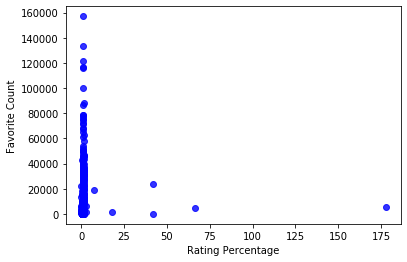

In [169]:
#visulization
import matplotlib.pyplot as plt

x = arc_lm['rating_percent']
y1 = arc_lm['favorite_count']
y2 = arc_lm['retweet_count']

plt.scatter(x,y1, color='blue', alpha=0.8)
plt.xlabel('Rating Percentage')
plt.ylabel('Favorite Count');

Text(0, 0.5, 'Retweet Count;')

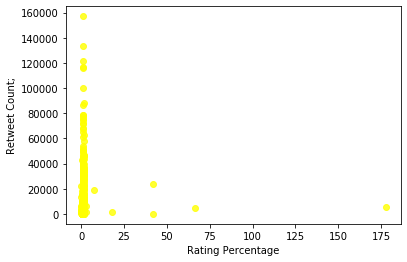

In [170]:
plt.scatter(x,y1,color='yellow',alpha=0.8)
plt.xlabel('Rating Percentage')
plt.ylabel('Retweet Count;')

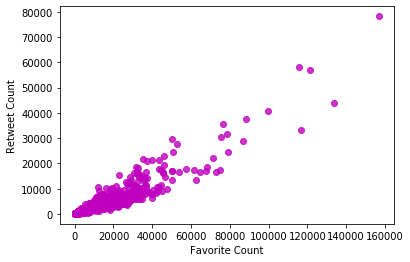

In [171]:
# Let's see if favorite count and retweet count are positively correlated
x_f = arc_lm['favorite_count']
y_t = arc_lm['retweet_count']

plt.scatter(x_f,y_t, color='m', alpha=0.8)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count');

As everyone would have expected, the is a very strong positive correlation between the favorite count and retweet count of Tweets. This is not difficult to understand because if a user like a tweet, it is more likely the user will share the post. But is there really no correlation between the rating of a tweet and its favorite count and retweet count? Let's create linear regression models to find it out!

In [172]:
import statsmodels.api as sm

arc_lm['intercept'] = 1

# simple linear regression: rating-favorite
lm_fav = sm.OLS(arc_lm['favorite_count'],arc_lm[['intercept','rating_percent']])
result_fav = lm_fav.fit()
result_fav.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4606
Date:                Mon, 27 Apr 2020   Prob (F-statistic):              0.497
Time:                        12:19:29   Log-Likelihood:                -23482.
No. Observations:                2171   AIC:                         4.697e+04
Df Residuals:                    2169   BIC:                         4.698e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       8146.1024    269.362     30.242      0.000    7617.869    8674.336
rating_percent    41.3414     60.913      0.679      0.497     -78.112     160.795
==============================================================================
Omnibus:                     2054.595   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           102261.683
Skew:                           4.446   Prob(JB):                         0.00
Kurtosis:                      35.426   Cond. No.                         4.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
# simple linear regression: rating-retweet
lm_ret = sm.OLS(arc_lm['retweet_count'],arc_lm[['intercept','rating_percent']])
result_ret = lm_ret.fit()
result_ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          retweet_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5143
Date:                Mon, 27 Apr 2020   Prob (F-statistic):              0.473
Time:                        12:19:29   Log-Likelihood:                -21287.
No. Observations:                2171   AIC:                         4.258e+04
Df Residuals:                    2169   BIC:                         4.259e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept       2450.1583     97.998     25.002      0.000    2257.979    2642.338
rating_percent    15.8922     22.161      0.717      0.473     -27.567      59.351
==============================================================================
Omnibus:                     2816.705   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           581183.440
Skew:                           7.029   Prob(JB):                         0.00
Kurtosis:                      81.913   Cond. No.                         4.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To my surprise, the rating of a tweet and its favorite count and retweet count seem really unrelated. From the result of the two linear regression model, the R-squareds are 0, which means 0% of the variability of favorite count and retweet count can be explained by the rating. The high p-values of both counts (almost 0.5 in both models) indicate no statistical significance.   
I guess most WeRateDogs viewers are very independent - they don't 'like' or retweet a Tweet simply because WeRateDogs gives a high rating to the pictures!